# Estudo dos fatores que influenciam o preço do carro anunciado online

Centenas de propagandas gratuitas de veículos são publicadas no nosso site todos os dias. O objetivo desse estudo è determinar quais fatores influenciaram o preço de um veículo baseando-se nos dados coletados nos últimos anos no período de 05 de janeiro de 2018 até  19 de Abril de 2019.

Após o estudo da estrutura e qualidade dos dados, vamos limpar e preparar los para a análise do comportamento do objeto "propaganda" no site, verificar o número de propagandas para cada tipo de veículo. Escolheremos alguns tipos dos veículos mais populares e estudaremos, se preço do veículo anunciado depende dos fatores tais como idade do carro, quilometragem, tipo de transmissão, a condição e a cor.

## Estudo e preparação dos dados.

### Carregamento dos dados e verificação da informação geral.
Vamos carregar as bibliotecas: pandas, matplotlib, plotly, streamlit, nbformat. Em seguida carregaremos o arquivo veicles_us.csv recebido do departamento de empresa para  a análise e respostas as perguntas acima listadas. Para fins de estabilidade de carregametno de dados deixaremos dois caminhos: primeiro para acesso dentro do plataforma do trabalho e segundo para acesso local.

In [140]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as strl
import nbformat as nbf
import seaborn as sns
import numpy as np
from scipy import stats as st


In [3]:
# Leitura dos dados
df_cars = pd.read_csv('vehicles_us.csv') 

### Exploraçâo os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`, numérico, número inteiro
- `model_year`, categórico, número inteiro
- `model`, categórico, string
- `condition`, categórico, string
- `cylinders`, categórico, número inteiro
- `fuel` — gasolina, diesel etc., categórico, string
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada, categórico, número inteiro
- `transmission`, categórico, string
- `type` - tipo do carro SUV, pickup, sedan, etc., categórico, string
- `paint_color`, categórico, string
- `is_4wd` — o veículo é 4 por 4, tipo booleano
- `date_posted` — a data que a propaganda foi publicada, data, DateTime
- `days_listed` — dias desde a publicação até a retirada, número inteiro

Vamos explorar os dados recebidos. Primeiramente veremos a quantidade das linhas e colunas, depois veremos as 10 primeiras linhas para verificar os possíveis problemas desse dados, depois obteremos as informações sobre os dados: tipos de dados e a quantidade dos valores não nulos.

In [4]:
df_cars.shape

(51525, 13)

O arquivo preparado pela equipe de marketing referente a publicação das propagandas gratuitas no site de venda dos carros de Lista de Eixo de Manivela os últimos anos contem 51525 linhas e 13 colunas.

In [5]:
df_cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Dessa primeira amostragem de dados podemos tirar as seguintes observações:
- A coluna `model_year` está como float, o preço esta expresso em números inteiros. Logo, tem que mudar para o tipo de dados int;
- A coluna `cylinders` está com tipo de dados float e deveria ser número inteiro, pois não existem frações decimais de cilindro de automóvel;
- A coluna `odometer` está com tipo de dados float e deveria ser número inteiro. A fração decimal de milhares de kilómetros rodados não é significativa;
- A coluna `date_posted`, a data que a propaganda foi publicada, está com tipo de dados texto e necessita a mudança para DateTime;
- As colunas `price`, `model`, `condition`, `fuel`, `transmission`, `type`, `paint_color` aparentemente estão com tipo de dado string  apropriado para a análise e não precisam de mudanças;
- A coluna `is_4wd` informa se o veículo está ou não 4 por 4  do tipo Booleano, não precisa de mudança;
- A coluna `days_listed`, a quantidade de dias, está com tipo de dados números inteiro e também não precisa de mudança.

Com certeza, os valores ausentes que apareceream logo nas primeiras 10 linhas chamam a atenção para o estudo.

In [6]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


As 13 colunas que armazenam 5125 linhas, há 5 colunas com dados ausentes, são elas:
- A coluna `model_year` com 47906 linhas; 
- A coluna `cylinders` com 46265 linhas;
- A coluna `odometer` com 43633 linhas; 
- A coluna `is_4wde` com 25572 linhas;
- E por fim a coluna `paint_color` com 42258 linhas.

As colunas citadas acima estão com quantidade de valores não nulos menor que a quantidade total das linhas no arquivo. As demais colunas do arquivo não apresentam os valores ausentes.

In [7]:
df_cars.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusões iniciais e próximos passos

Suponhamos, que o tipo de fuel "electric" trata-se do carro elétrico, nesse caso o motor do carro não tem os cilindros. 

- Na coluina `price` temos mínimo de 1, valor irreal para venda do carro. Alem disso mediana é de 9000, também indica que ou a quantidade grande dos carros são muito velhos ou alguns valores fora da realidade que puxam a mediana para baixo. Máximo de 375000 parece valor estranho para os modelos de carros no conjunto, o preço do bmw x5 novo é por volta de 64000, cadillac escalade novo por volta de 82000. Não temos Rolls Roys ou Bugatti na lista. Precisamos estudar melhor;
- Na coluna `model_year` o mínimo de ano 1908, quase a idade do primeiro carro que foi criado em 1886. Parece estranho e necessita do estudo;
- Na coluna `odometer` o máximo de 990000 km, parece muito até para  o carro movido à diesel. Precisamos continuar no estudo desse fenômeno;
- Na coluna `days_listed` o máximo esta de 271 dias, 9 meses, valor alto. Precisamos estudar melhor, se isso é típico para a permanência dos anúncios no site;
- Na coluna `cylinders` aparece o mínmo de 3, vamos verificar e consultar o departamento técnico para saber se número dos cilidros ímpar é valido;
- Na coluna `is_4wd` metade dos valores estão ausentes, vamos tratar isso;

As 5 colunas `model_year`, `cylinders`, `odometer`, `is_4wde` e `paint_color` contêm os valores ausentes que exigem a verifiação a parte para entender a natureza, as possíveis razões de ausências de dados e a importância deles para o objetivo de estudo. Dependendo desses fatores precisamos tomar a desisão se iremos preencher ou não, se sim, escolheremos o método de preenchimento appropriado.

As 4 colunas `date_posted`, `model_year`, `odometer` e `cylinders` precisam de correção de tipo de dados.

Verificaremos a presença dos valores duplicados óbvios para checarmos as ortografias diferentes ou artefatos estranhos.

Por último vamos enriquecer os nossos dados através de adição das informações relevantes para o análise posterior: ano, mês e dia da semana do anúncio, a quilometragem anual e categorização da condição.

### Valores ausentes

#### Estudo dos valores ausentes

Começaremos o nosso tratamento dos valores ausentes com a coluna `is_4wd`, pois nela quase a metade dos valores estão nulos. Nessa coluna os valores são de tipo Booleano. A nossa hipótese é que os valores nulos foram o resultado do processamento errado. Por exemplo, em uma das etapas de ler o arquivo tipo .csv, os zeros nessa coluna se converteram em valores NaN. Iremos verificar os valores únicos na coluna. Se teremos somente 1 e NaN, vamos preencher os valores nulos na coluna `is_4wd` com os zeros para manter o padrão do valor tipo booleano.

Nas colunas de `model_year`, `odometer`, `cylinders`, `paint_color` não achamos o padrão, provavelmente o resultado do erro técnico.

In [8]:
df_cars['is_4wd'].unique()

array([ 1., nan])

In [9]:
df_cars['is_4wd'] = df_cars['is_4wd'].fillna(0).astype(int)
df_cars['is_4wd'].isna().sum()

0

Vamos estudar, se existe algum padrão nos valores ausentes nessas colunas `model_year` e `odometer`, que vamos deixar anotado, são dependentes. Teoricamente, quanto mais velho é o carro , mais quilômetros rodados podemos esperar. Para essas duas colunas vamos fazer os seguintes passos:

1) verificar a quantidade dos valores ausentes e porcentagem em relação ao conjunto original para avaliar se a parte é significativa;
2) já sabemos que o conjunto é assimétrico quanto aos valores ausentes, vamos ver o grau dessa assimetria. Precisamos ver, se o valor ausente do ano e da quilometragem encontam-se nas linhas diferentes. Nesse caso podemos pensar em preehcher por média/mediana, o que servir melhor, do agrupamento por modelo e ano do carro. As linhas com ambos parâmetros ausentes não podemos usar para o eventual preenchimento dos dados. 
3) ver se os valores ausentes sao aleatórios ou existe algum padrão que permite ?

In [10]:
print(df_cars['model_year'].isnull().sum())
df_cars['model_year'].isnull().sum() / df_cars.shape[0]

3619


0.07023774866569626

In [11]:
print(df_cars['odometer'].isnull().sum())
df_cars['odometer'].isnull().sum() / df_cars.shape[0]

7892


0.15316836487142163

In [14]:
cars_year_odometer_na = df_cars[(df_cars['odometer'].isnull()) & (df_cars['model_year'].notnull())]
print(cars_year_odometer_na.shape)

cars_odometer_year_na = df_cars[(df_cars['model_year'].isnull()) & (df_cars['odometer'].notnull())]
print(cars_odometer_year_na.shape)

df_cars[(df_cars['odometer'].isnull()) & (df_cars['model_year'].isnull())].shape

(7343, 13)
(3070, 13)


(549, 13)

Na coluna `model_year` temos 3619  valores ausentes, 7.0% do total do conjunto de dados. Provavelmente, esse campo foi opcional na hora de preencher os campos do anúncio gratuito no site e alguns proprietários deixaram esse campo sem os dados do ano do modelo do seu veículo.
Na coluna `odometer` temos 7892 valores ausentes, 15.3% do total do conjunto de dados. Qual é a razão??

Temos também 549 ocorrências com os valores ausentes em ambas colunas.

In [15]:
print(df_cars['cylinders'].isnull().sum())
df_cars['cylinders'].isnull().sum() / df_cars.shape[0]

5260


0.10208636584182436

Na coluna `cylinders` temos 5260 valores ausentes, 10% do total. Para parte significativa, temos que pensar em achar a maneira de preencher esses dados.

Vamos verificar os motores com número de cilindros ímpares. Para resolver essa questão pegamos o número dos carros com número de cilindro ímpar, depois fatiamos os dados para saber quais modelos tem 3 ou 5 cilindros. A pesquisa (ou consulta com o departamento responsável) mostrou que realmente existem, por exemplo, VW Jetta com motor de 5 cilindros e, em geral, a quantidade dos cilindros ímpar no motor é válida.

In [16]:
print(df_cars['cylinders'].value_counts())
df_cars.query('cylinders in [3,5]').pivot_table(index='model', columns='cylinders',values='type', aggfunc='count')

cylinders
8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64


cylinders,3.0,5.0
model,,
chevrolet colorado,NaN,82.0
chevrolet tahoe,NaN,1.0
chevrolet traverse,1.0,NaN
dodge grand caravan,1.0,NaN
ford edge,NaN,1.0
ford escape,1.0,NaN
ford expedition,NaN,1.0
ford f-150,2.0,2.0
ford f150,NaN,1.0


In [17]:
print(df_cars['paint_color'].isnull().sum())
df_cars['paint_color'].isnull().sum() / df_cars.shape[0]

9267


0.17985443959243086

Então, amostras do tamanho  7%, 10,2%, 18%  e 15%, podem ser considerados material e por esse motivo merecem o estudo mais aprofundado.
Vamos adicionar 4 colunas temporárias `model_year_na`, `odometer_na` , `cilinders_na`  e  `paint_color_na` para facilitar a análise dos valores ausentes, essas colunas vão armazenar os valores booleanos referente, se o campo é valido ou ausente. Essas colunas serão removidas antes do início do análise dos dados limpos.

Passos:
1) comparar a distribuição dos valores ausentes nessas 4 colunas com a distribuição dos valores ausentes nos agrupamentos por os seguintes fatores: 
'model', 'condition', 'odometer', 'type', 'paint_color', 'fuel', 'cylinders';
2) fazer os gráficos de linha das quantidades dos valores válidos e dos ausentes normalizados;
3) calcular a média dessa distribuição por parâmetro

Se a média for parecida com a distribuição no conjunto original, não existe o padrão, os valores ausentes podem ser considerados aleatórios. Os casos quando a distribuição por parâmetro difere da distribuição original devem ser estudados para ver razões dessa diferença. Temos que levar em consideração a quantidade de ocorrências por valor do parâmetro. A diferença de distribuição no grupo pequeno, menos de 50 não pode ser relevante para o estudo. 

Como são 4 colunas com valores ausentes e 7 parâmetros para cada coluna, vamos automatizar o teste através da função `test_na`.  
Poderiamos automatizar o resultado para todas as colunas, porém para facilitar a leitura, chamaremos a função por coluna e comentaremos os 7 gráficos e médias de distribuição por chamada.


In [18]:
df_cars['model_year_na'] = df_cars['model_year'].isna()
df_cars['odometer_na'] = df_cars['odometer'].isna()
df_cars['cylinders_na'] = df_cars['cylinders'].isna()
df_cars['paint_color_na'] = df_cars['paint_color'].isna()

In [19]:
df_cars.isna().sum()

price                0
model_year        3619
model                0
condition            0
cylinders         5260
fuel                 0
odometer          7892
transmission         0
type                 0
paint_color       9267
is_4wd               0
date_posted          0
days_listed          0
model_year_na        0
odometer_na          0
cylinders_na         0
paint_color_na       0
dtype: int64

In [23]:
print(len(df_cars.odometer.value_counts()))

17762


A coluna `odometer` tem 17762 valores únicos. Para evitar a análise de distribuição por grupos pequenos vamos categorizar os dados da quilometragem por 4 faixas de 50 km e a faixa de 200+ km. Iremos testar a função e aplicar na respectiva coluna.

In [24]:
def assign_odometer_category(odometer):
    if 0 <= odometer < 49999:
        return "0-49K"
    
    elif 50000 <= odometer < 99999:
        return "50-99K"
    
    elif 100000 <= odometer < 149999:
        return "100-149K"
    
    elif  150000 <= odometer < 199999:
        return "150-199K"
    
    else:
        return '200K+'

In [25]:
assign_odometer_category(373000)

'200K+'

In [26]:
df_cars['odometer_cat'] = df_cars.odometer.apply(assign_odometer_category).copy()
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_na,odometer_na,cylinders_na,paint_color_na,odometer_cat
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,False,False,False,True,100-149K
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,True,False,False,False,50-99K
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,False,False,False,False,100-149K
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,False,True,False,True,200K+
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,False,False,False,False,50-99K


Agora podemos iniciar a análise de distribuição dos valores ausentes por 7 fatores.

In [40]:
test_na_param = ['model', 'condition', 'odometer_cat', 'type', 'paint_color', 'fuel', 'cylinders']

def test_na(parameters, column):
    for parameter in parameters:
        plt.rcParams['figure.figsize'] = (8,3)
        fig, ax = plt.subplots()
        df_cars.groupby(parameter)[column].value_counts(normalize=True).unstack().plot(ax=ax)
        ax.text(1.5, 0.8, df_cars.groupby(parameter)[column].value_counts(normalize=True).unstack().mean().to_string())

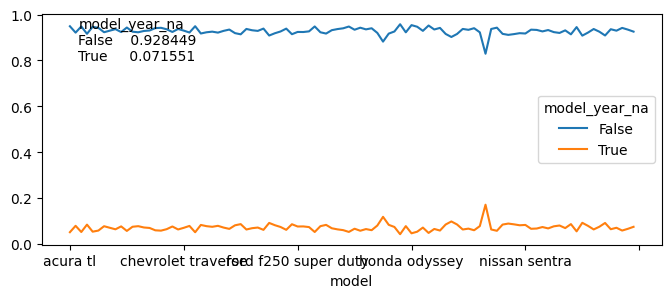

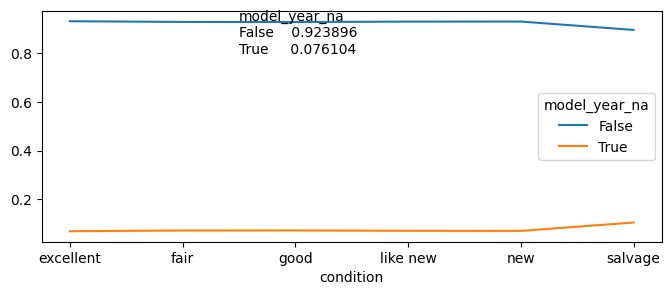

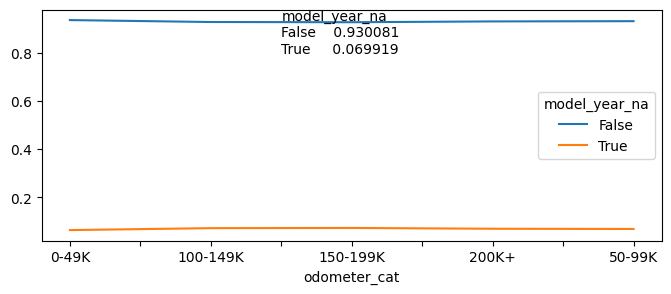

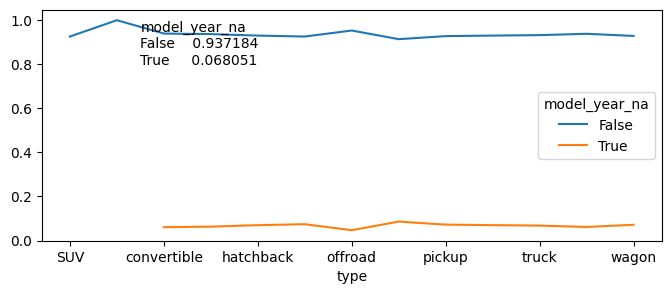

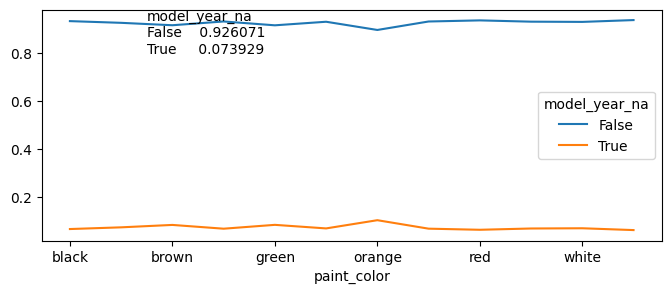

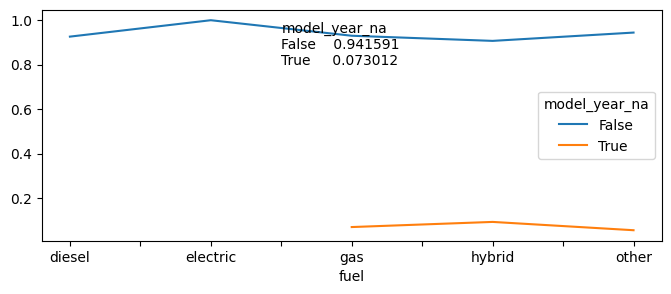

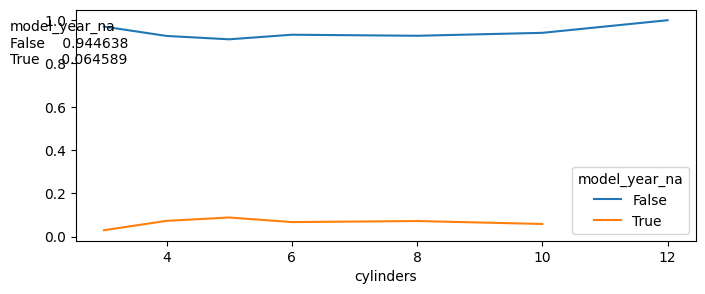

In [41]:
test_na(test_na_param, 'model_year_na')

**Conclusão intermediária**

**ANO DO CARRO - DISTRIBUIÇÂO**

A coluna `model_year` tinha 7% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 6.8% e 7,6%, em acordância com a distribuição no conjunto original. 

Não há evidências da existência do padrão ou dependência dos valores ausentes de 1 ou mais fatores. Os valores ausentes são aleatórios.

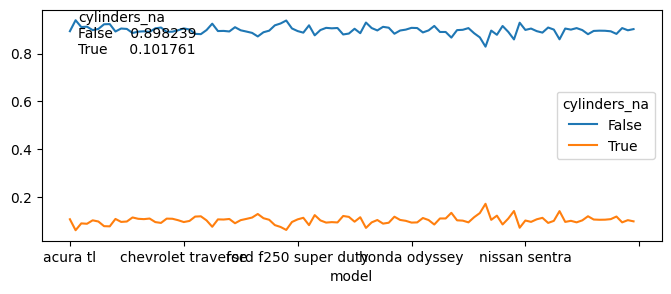

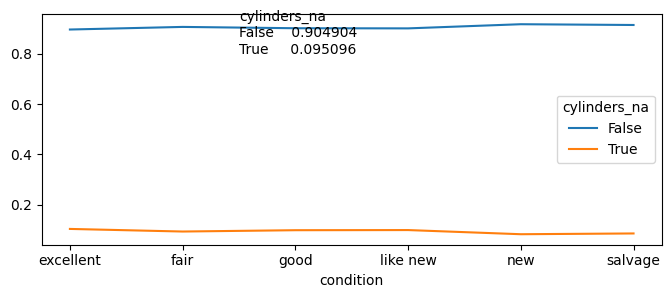

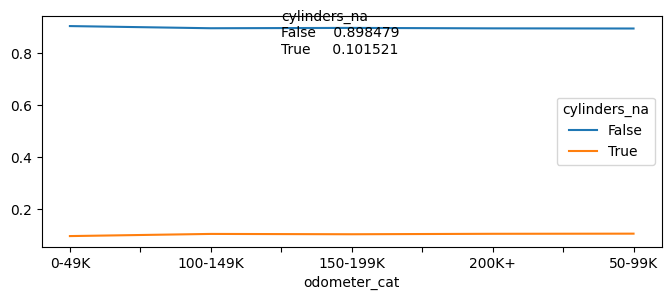

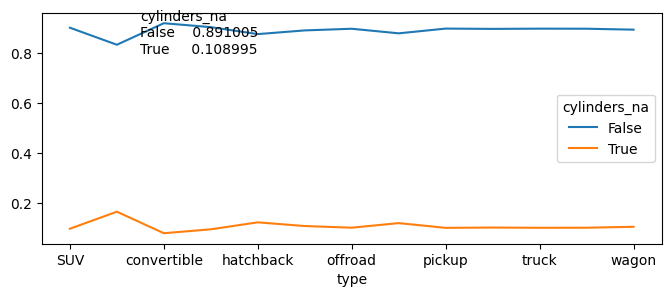

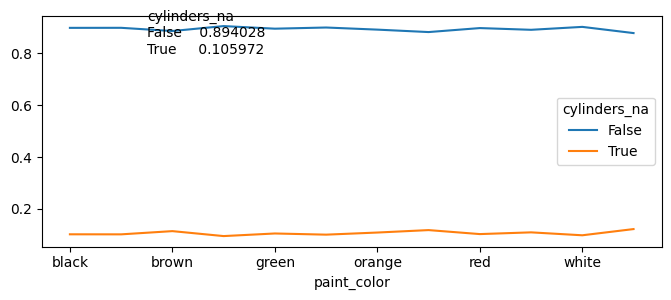

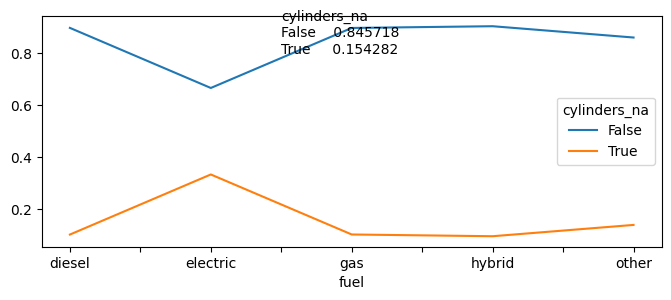

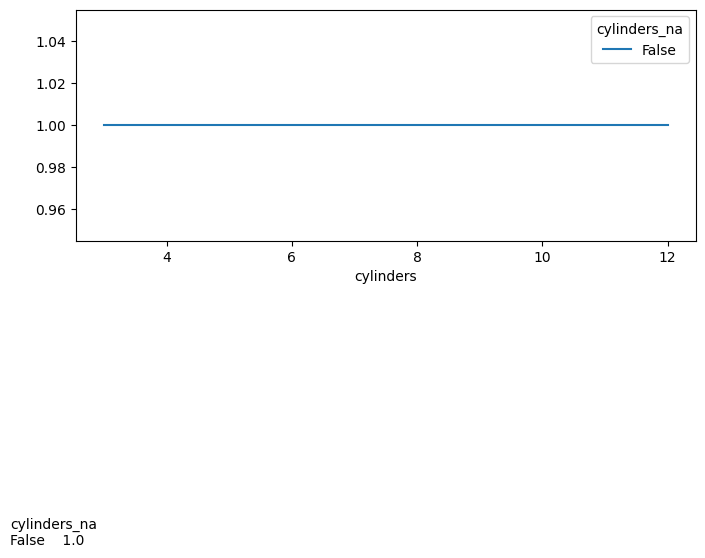

In [42]:
test_na(test_na_param, 'cylinders_na')

In [43]:
print(df_cars.query('fuel=="electric"').model.count())
print(df_cars.query('fuel=="electric"').cylinders.isna().sum())

6
2


**Conclusão intermediária**

**QUANTIDADE DO CILINDROS - DISTRIBUIÇÂO**

A coluna `cylinders` tinha 10.2% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 8.0% e 10.9%, em acordância com a distribuição no conjunto original. O pico que influencia a média no tipo de fuel 'electric' refere-se às 6 ocorrências desse tipo, 2 (33%) dos quais apresentam os valores ausentes. Isso foi a razão de elevação da média para 5 valores do parâmetro 'fuel', podemos desconsiderar. 

Não há evidencias de existência do padrão ou dependência dos valores ausentes de 1 ou mais fatores. Os valores ausentes são aleatórios.

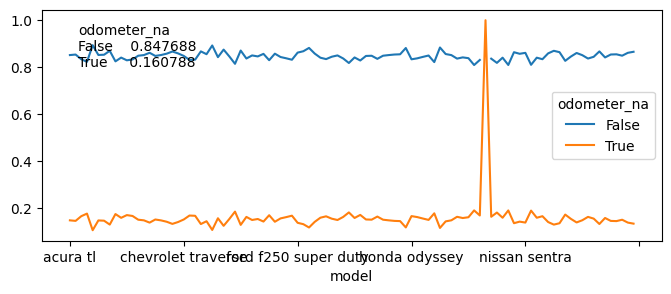

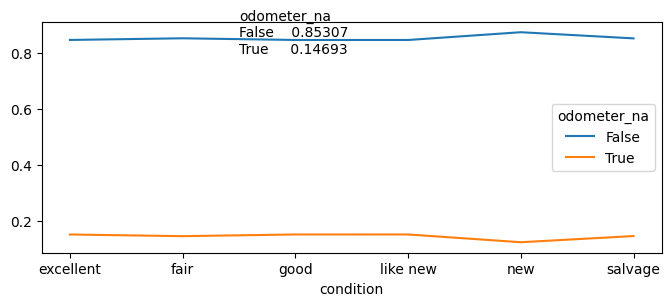

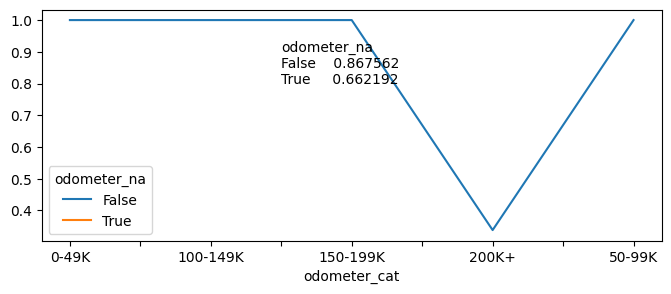

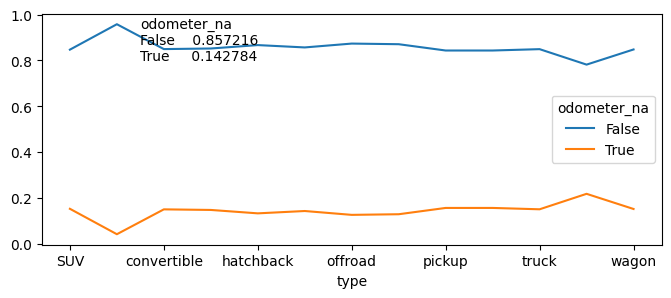

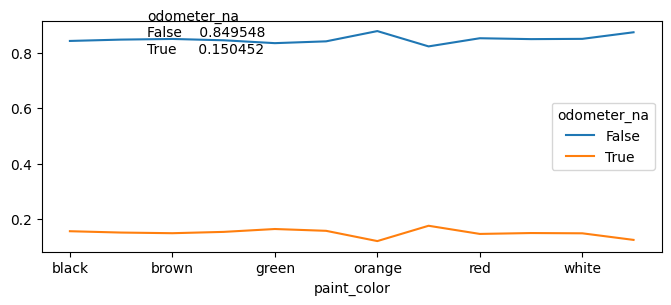

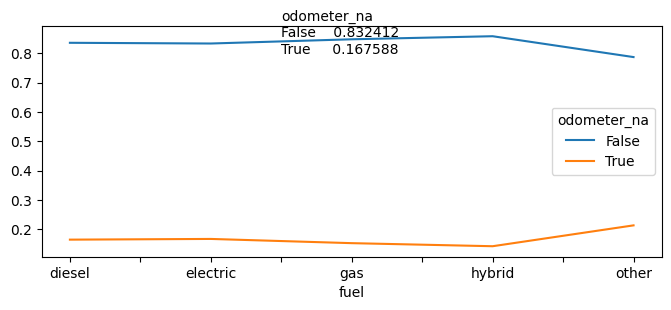

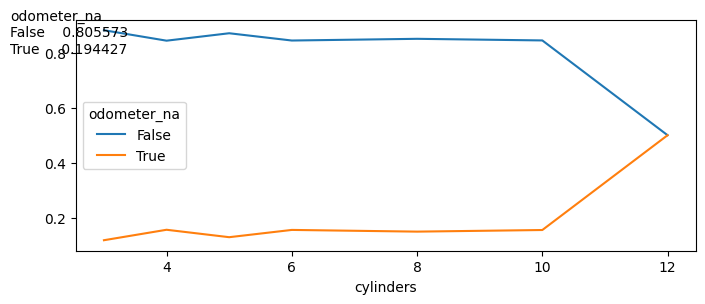

In [44]:
test_na(test_na_param, 'odometer_na')

In [45]:
print(df_cars.query('cylinders == 12')['odometer'].count())
print(df_cars.query('model == "mercedes-benz benze sprinter 2500"')['odometer'].isna().sum())
df_cars.query('model == "mercedes-benz benze sprinter 2500"')['odometer'].count()

1
41


0

**Conclusão intermediária**

**QUILOMETRAGEM- DISTRIBUIÇÂO**

A coluna `odometer` tinha 15.3% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 14.3% e 16.0%, em acordância com a distribuição no conjunto original. O pico da média elevada nos modelos do carro refere-se aos 41 ocorrências no modelo mercedes-benz benze sprinter 2500, não material, podemos desconsiderar. O aumento da média entre os carros com 12 cilindros refere-se à 1 ocorrência, não material, podemos desconsiderar. 

Não há evidencias de existência do padrão ou dependência dos valores ausentes de 1 ou mais fatores. Os valores ausentes são aleatórios<br>

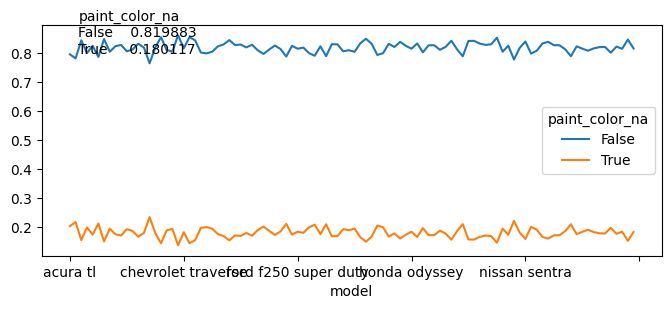

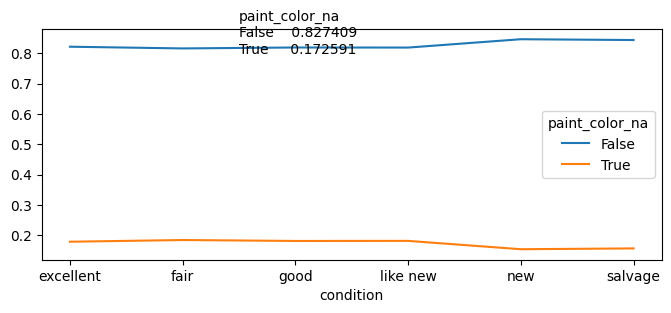

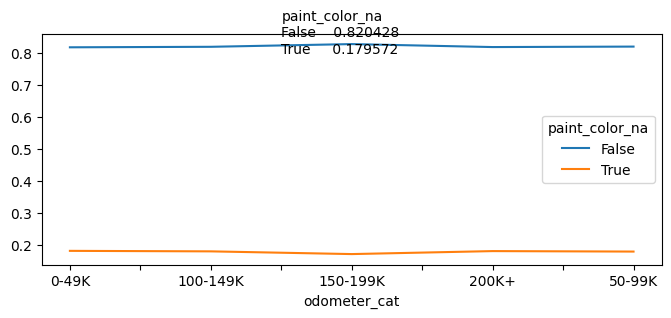

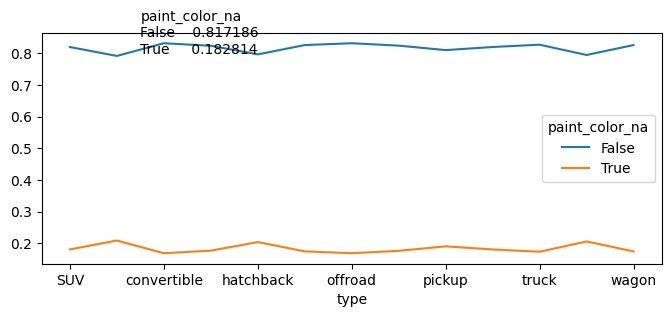

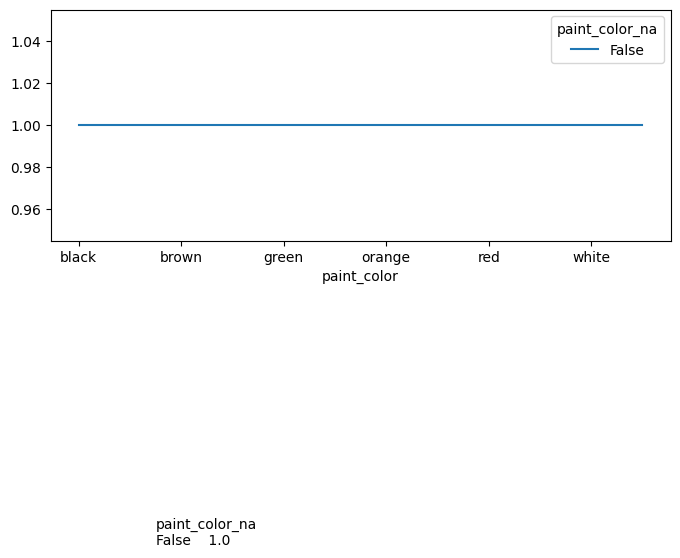

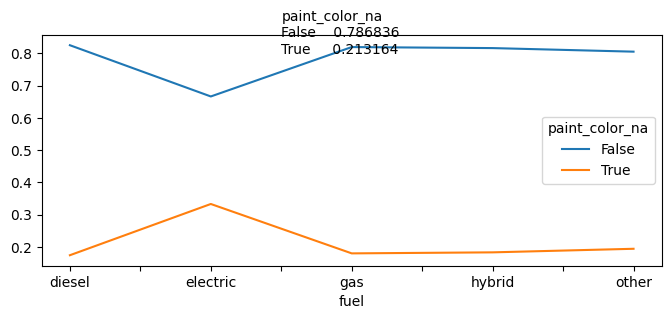

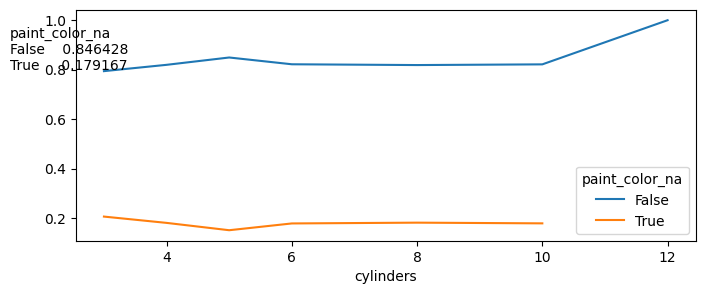

In [46]:
test_na(test_na_param, 'paint_color_na')

**Conclusão intermediária**

**COR - DISTRIBUIÇÂO**

A coluna `paint_color` tinha 18% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 17.3% e 18.3%, em acordância com a distribuição no conjunto original. A elevação da média no tipo de fuel "eletric" refere-se às 6 ocorrências desse tipo, 2 (33%) dos quais apresentam os valores ausentes. Isso foi a razão de elevação da média para 5 valores do parâmetro 'fuel', podemos desconsiderar.

Não há evidencias de existência do padrão ou dependência dos valores ausentes de 1 ou mais fatores. Valores ausentes são aleatórios.

### **Conclusão**

- A coluna `model_year` tinha 7% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 6.8% e 7,6%, em acordância com a distribuição no conjunto original;
- A coluna `cylinders` tinha 10.2% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 8.0% e 10.9%, em acordância com a distribuição no conjunto original;
- A coluna `odometer` tinha 15.3% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 14.3% e 16.0%, em acordância com a distribuição no conjunto original;
- A coluna `paint_color` tinha 18% dos valores ausentes no conjunto original. A média da participação dos ausentes avaliada por fatores está entre 17.3% e 18.3%, em acordância com a distribuição no conjunto original.

Não achar o padrão até agora leva à conclusão de ausência aleatória dos dados. Essa ausência pode ser o resultado de um erro técnico. Partimos para o preenchimento dos valores ausentes por média ou mediana, o que servir melhor nas variáveis numéricas, quilometragem e ano do modelo. Vamos pensar nas outras abordagens para as variáveis categóricas.


#### Preencimento dos valores ausentes

Vamos verificar a informação sobre os vaores ausentes nas 4 colunas  e iniciar o preenchimento:
- Na coluna `model_year` temos 3619 valores ausentes, 7.0% do total do conjunto de dados;
- Na coluna `cylinders` temos 5260 valores ausentes, 10.2% dos valores ausentes no conjunto original;
- Na coluna `odometer` temos 7892 valores ausentes, 15.3% do total do conjunto de dados;
- Na coluna `paint_color` temos 9267 valores ausentes, 18.0% dos valores ausentes no conjunto original.

In [47]:
df_cars.isna().sum()

price                0
model_year        3619
model                0
condition            0
cylinders         5260
fuel                 0
odometer          7892
transmission         0
type                 0
paint_color       9267
is_4wd               0
date_posted          0
days_listed          0
model_year_na        0
odometer_na          0
cylinders_na         0
paint_color_na       0
odometer_cat         0
dtype: int64

Para cuidarmos dos valores ausentes de quantidade dos cilindros; vamos agrupar os carros por modelo, ano do carro e quantidade dos cilindros. Se o grupo tiver só um valor, ele serve para os outros carros desse modelo desse ano. Se o modelo em um ano específico teria várias quantidades dos cilindros, preencheremos a informação faltante pela moda, o valor mais frequente no grupo.

In [48]:
parameters_cyl = ['model', 'model_year']
cyl_counts = df_cars.groupby(by=parameters_cyl).cylinders.value_counts().groupby(parameters_cyl).head(1).rename('qty')
cyl_to_join = cyl_counts.reset_index().groupby(parameters_cyl).cylinders.min().rename('mode_cyl')
cyl_to_join.head()

model     model_year
acura tl  1999.0        6.0
          2001.0        6.0
          2002.0        6.0
          2003.0        6.0
          2004.0        6.0
Name: mode_cyl, dtype: float64

In [49]:
df_cars = df_cars.join(cyl_to_join, on=parameters_cyl).copy()
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_na,odometer_na,cylinders_na,paint_color_na,odometer_cat,mode_cyl
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,False,False,False,True,100-149K,6.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,True,False,False,False,50-99K,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,False,False,False,False,100-149K,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,False,True,False,True,200K+,8.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,False,False,False,False,50-99K,4.0


In [50]:
df_cars['cylinders'] = df_cars['cylinders'].fillna(df_cars['mode_cyl'])
df_cars.cylinders.isna().sum()

389

In [51]:
df_cars.isna().sum()

price                0
model_year        3619
model                0
condition            0
cylinders          389
fuel                 0
odometer          7892
transmission         0
type                 0
paint_color       9267
is_4wd               0
date_posted          0
days_listed          0
model_year_na        0
odometer_na          0
cylinders_na         0
paint_color_na       0
odometer_cat         0
mode_cyl          3645
dtype: int64

Ficaram somente 389 valores ausentes nos cilindros. Isso aconteceu por motivo que a linha do conjunto original no momento de agrupamento por modelo e ano do carro não entrou em nenhum grupo por ter o valor ausente na coluna do ano de carro.

Chegamos na conclusão que os valores ausentes nas colunas de quilometragem e ano do carro são aleatórios procedentes de um erro técnico. Podemos agrupar os carros por modelo e ano do modelo. Nesses grupos a mediana representará melhor ambos parâmetros, desde que existem valores atípicos nas coluna deano do carro que puxam a média para cima em comparação com a mediana: média 2009 e mediana 2011, além disso o ano deve ser espresso em valor inteiro. Na coluna de quilometragem a diferença é menor: média de 11555 km e a mediana de 11300. Vamos usar a mediana.

In [67]:
parameters_odom = ['model', 'model_year']
odom_to_join = df_cars.groupby(by=parameters_odom).odometer.median().rename('median_odometer')
odom_to_join.head()

model     model_year
acura tl  1999.0        196000.0
          2001.0        177770.0
          2002.0        189200.0
          2003.0        142500.0
          2004.0        183000.0
Name: median_odometer, dtype: float64

In [63]:
df_cars = df_cars.join(odom_to_join, on=parameters_odom).copy()
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_na,odometer_na,cylinders_na,paint_color_na,odometer_cat,mode_cyl,median_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,False,False,False,True,100-149K,6.0,113517.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,True,False,False,False,50-99K,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,False,False,False,False,100-149K,4.0,108489.5
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,False,True,False,True,200K+,8.0,177500.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,False,False,False,False,50-99K,4.0,80903.0


In [68]:
df_cars['odometer'] = df_cars['odometer'].fillna(df_cars['median_odometer'])
df_cars.odometer.isna().sum()

625

In [69]:
parameters_model_year = ['model', 'odometer']

year_to_join = df_cars.groupby(by= parameters_model_year).model_year.median().rename('median_year')
year_to_join.head()

model     odometer
acura tl  143.0       2004.0
          160.0          NaN
          165.0       2007.0
          18600.0     2003.0
          36000.0     2012.0
Name: median_year, dtype: float64

In [70]:
df_cars = df_cars.join(year_to_join, on=parameters_model_year).copy()
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,model_year_na,odometer_na,cylinders_na,paint_color_na,odometer_cat,mode_cyl,median_odometer,median_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2018-06-23,19,False,False,False,True,100-149K,6.0,113517.0,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,True,False,False,False,50-99K,NaN,NaN,2014.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,False,False,False,False,100-149K,4.0,108489.5,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,NaN,...,2019-03-22,9,False,True,False,True,200K+,8.0,177500.0,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,False,False,False,False,50-99K,4.0,80903.0,2017.0


In [71]:
df_cars['model_year'] = df_cars['model_year'].fillna(df_cars['median_year'])
df_cars.model_year.isna().sum()

2080

In [73]:
df_cars.isna().sum()

price                 0
model_year         2080
model                 0
condition             0
cylinders           389
fuel                  0
odometer            625
transmission          0
type                  0
paint_color        9267
is_4wd                0
date_posted           0
days_listed           0
model_year_na         0
odometer_na           0
cylinders_na          0
paint_color_na        0
odometer_cat          0
mode_cyl           3645
median_odometer    3695
median_year        2156
dtype: int64

**Conclusão intermediaria**

Provável erro técnico na coluna de 4 por 4 (`is_4wd`) foi preenchido com 0. Nas demais colunas os valores ausentes foram considerados aleatórios.

Resultante do preeenchimento temos pela mediana do ano do carro dos agrupamentos por modelo e quilometragem, na coluna `model_year` restaram 2080 valores ausentes, 4.0% do total do conjunto de dados. 

A coluna `odometer` foi preenchida pela mediana da quilometragem dos agrupamentos por modelo e idade do carro, e agora temos 625 valores ausentes, 1.2% do total do conjunto de dados. Apoś preenchermos pela moda, o valor mais frequente na variável categórica foi a quantidade dos cilindro, ficaram 389 valores ausentes, 0,76%  dos valores ausentes no conjunto original.

Por último, na coluna `paint_color` ainda temos os mesmos 9267 valores ausentes, 18.0% dos valores ausentes no conjunto original. Não há informação suficiente para preencher 18%, a fatia significativa do conjunto referente na coluna categôrica. Deixaremos valor "sem cor informado" como valor da variável categôrica.

Partiremos para verificação dos valores duplicados óbvios.

### Dados duplicados

In [74]:
sorted(df_cars['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

In [75]:
df_cars['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [76]:
df_cars['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [77]:
df_cars['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

Vamos voltar na questão das 6 ocorrências do tipo de fuel "electric". Essas ocorrências tem informação sobre a quantidade dos cilindros. Ou foi erro do anuciante e o carro nâo é elétrico ou a quantidade dos cilindros é zero. De qualquer maneira removeremos essas 6 ocorrências contraditórias.

In [78]:
df_cars = df_cars.query('fuel != "electric"')
df_cars.query('fuel == "electric"').fuel.count()

0

In [79]:
df_cars['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [80]:
df_cars['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [81]:
df_cars[df_cars.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,model_year_na,odometer_na,cylinders_na,paint_color_na,odometer_cat,mode_cyl,median_odometer,median_year


### **Conclusão**

Modelos, condição, transmissão, tipo de carro, combustível, cor parecem bem organizados, sem ortografias diferentes ou artefatos estranhos. Não há valores duplicados para remover.

Removemos as 6 ocorrências contraditórias do tipo de fuel "electric". Não apareceram as duplicatas por todo o conjunto de campos, não existem as duplicatas óbvias nas linhas do conjunto. Mesmo assim precisamos estudar mais e procurar as duplicatas não tão óbvias em um dos próximos passos.

### Correção dos tipos de dados

As colunas `model_year`, `cylinders`, `odometer` deveriamos mudar para o número inteiro, pois tratam-se dos anos, cilindros e quilômetros. No momento ainda temos os valores ausentes e vamos manter o tipo float. Mudaremos para o int na fase final de apresentação dos dados. A coluna `date_posted` devemos mudar para o formato de data.

Verificaremos os tipos de dados do nosso conjunto até agora.

In [82]:
df_cars['date_posted'] = pd.to_datetime(df_cars['date_posted'], format='%Y-%m-%d')
df_cars['date_posted'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

In [83]:
df_cars.dtypes

price                       int64
model_year                float64
model                      object
condition                  object
cylinders                 float64
fuel                       object
odometer                  float64
transmission               object
type                       object
paint_color                object
is_4wd                      int64
date_posted        datetime64[ns]
days_listed                 int64
model_year_na                bool
odometer_na                  bool
cylinders_na                 bool
paint_color_na               bool
odometer_cat               object
mode_cyl                  float64
median_odometer           float64
median_year               float64
dtype: object

### Enriquecimento os dados

Para tornamos nossa análise mais aprofundada adicionaremos alguns atributos como ano, mês e dia da semana da data em que a propaganda foi publicada. Além disso colocaremos a idade em anos do veículo no momento de publicação de propadanda e quilometragem média por ano. A coluna `odometer_cat` adicionada no passo de valores ausentes por enquanto vai permanecer para a análise. Removeremos as demais colunas temporárias.

In [84]:
df_cars['year'] = df_cars['date_posted'].dt.year
df_cars['month'] = df_cars['date_posted'].dt.month
df_cars['weekday'] = df_cars['date_posted'].dt.weekday

In [85]:
df_cars['car_age'] = df_cars['year'] - df_cars['model_year']
df_cars['car_age'].head()

0     7.0
1     4.0
2     6.0
3    16.0
4     2.0
Name: car_age, dtype: float64

In [86]:
df_cars['annual_km'] = round(df_cars['odometer'] / df_cars['year'], 2)
df_cars['annual_km'].head()

0    71.85
1    43.96
2    54.48
3    87.91
4    40.07
Name: annual_km, dtype: float64

Para fazer a nossa futura manipulação dos dados mais elegante, nesse momento acrescentaremos uma coluna `condit_num` que substitua os valores de string na coluna `condition` por uma escala numérica:
- novo = 5
- como novo = 4
- excelente = 3
- bom = 2
- razoável = 1
- sucata = 0

No momento vamos manter a coluna original `condition`. Após a verificação dos dados limpos deixaremos somente as colunas que vamos usar na análise. Mudaremos o tipo de dados da nova coluna para 'categórica' para reduzir o uso da memória.

In [87]:
numeric_condition = ['good', 'like new', 'fair', 'excellent', 'salvage', 'new']

def assign_condition_category(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif  condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    else:
        return 0

In [88]:
condition = 'new'
assign_condition_category(condition)

5

In [89]:
df_cars['condit_num'] = df_cars['condition'].apply(assign_condition_category)

print(df_cars['condit_num'].head())

0    2
1    2
2    4
3    1
4    3
Name: condit_num, dtype: int64


In [91]:
df_cars = df_cars.drop(['model_year_na', 'odometer_na', 'cylinders_na','paint_color_na',  'mode_cyl', 'median_year', 'median_odometer'], axis=1)

### Verificação dos dados limpos

Vamos dar uma olhada nos dados após a fase de exploração inicial e limpeza.

In [92]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51519 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51519 non-null  int64         
 1   model_year    49439 non-null  float64       
 2   model         51519 non-null  object        
 3   condition     51519 non-null  object        
 4   cylinders     51130 non-null  float64       
 5   fuel          51519 non-null  object        
 6   odometer      50894 non-null  float64       
 7   transmission  51519 non-null  object        
 8   type          51519 non-null  object        
 9   paint_color   42254 non-null  object        
 10  is_4wd        51519 non-null  int64         
 11  date_posted   51519 non-null  datetime64[ns]
 12  days_listed   51519 non-null  int64         
 13  odometer_cat  51519 non-null  object        
 14  year          51519 non-null  int32         
 15  month         51519 non-null  int32      

In [93]:
df_cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_cat,year,month,weekday,car_age,annual_km,condit_num
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,100-149K,2018,6,5,7.0,71.85,2
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,50-99K,2018,10,4,4.0,43.96,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,100-149K,2019,2,3,6.0,54.48,4
3,1500,2003.0,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,NaN,0,2019-03-22,9,200K+,2019,3,4,16.0,87.91,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,50-99K,2019,4,1,2.0,40.07,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,50-99K,2018,6,2,4.0,28.72,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,50-99K,2018,12,3,3.0,39.25,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,100-149K,2019,1,0,6.0,54.22,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1,2018-07-16,19,100-149K,2018,7,0,6.0,51.62,3
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,100-149K,2019,2,4,11.0,72.90,3


O conjunto tem 51519 linhas, 19 colunas. Adicionamos as colunas `days_listed`, `year`, `month`, `weekday` para enrequecimento de dados. Após transformação de dados, remoção de 6 linhas "eletric", primeira verificação das duplicadas óbvias e prenchimento dos valores ausentes numéricos e categóricos ainda temos os valores ausentes.

Partiremos para Exploratory data analysis (EDA).

## Análise exploratória dos dados

Os parâmetros são:
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

Iremos construir os histogramas para todos os cinco parâmetros, avaliar a forma, picos, caudas. Para evitar os duplicamentos no código, vamos automatizar a criação dos histogramas criando uma função. Chamaremos mais uma vez a estatística descritiva das colunas numéricas para obter os dados sobre mínimo, máximo, mediana, média, desvio padrão dos nossos parâmetros.

In [94]:
df_cars.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year,month,weekday,car_age,annual_km,condit_num
count,51519.000000,49439.000000,51130.000000,50894.000000,51519.000000,51519,51519.000000,51519.000000,51519.000000,51519.000000,49439.000000,50894.000000,51519.000000
mean,12133.058755,2009.760402,6.120086,115364.062699,0.496322,2018-10-25 01:50:22.675129344,39.554339,2018.307459,6.628370,3.005590,8.547088,57.158856,2.637454
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,-1.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,71719.000000,0.000000,2018-07-29 00:00:00,19.000000,2018.000000,3.000000,1.000000,4.000000,35.540000,2.000000
50%,9000.000000,2011.000000,6.000000,113918.000000,0.000000,2018-10-25 00:00:00,33.000000,2018.000000,7.000000,3.000000,7.000000,56.440000,3.000000
75%,16846.000000,2014.000000,8.000000,153445.000000,1.000000,2019-01-21 00:00:00,53.000000,2019.000000,10.000000,5.000000,12.000000,76.030000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,6.000000,110.000000,490.580000,5.000000
std,10041.105372,6.263664,1.657946,62925.387744,0.499991,NaN,28.205319,0.461446,3.474041,1.997759,6.276943,31.177430,0.712376


In [95]:
df_cars.query('odometer < 10')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_cat,year,month,weekday,car_age,annual_km,condit_num
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1,2019-03-16,88,0-49K,2019,3,5,10.0,0.0,3
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,0,2019-03-14,16,0-49K,2019,3,3,20.0,0.0,2
1375,5888,2004.0,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,0,2019-02-22,36,0-49K,2019,2,4,15.0,0.0,2
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,0,2018-09-28,47,0-49K,2018,9,4,26.0,0.0,2
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1,2018-11-21,39,0-49K,2018,11,2,18.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1,2019-02-15,7,0-49K,2019,2,4,17.0,0.0,2
50412,25500,2014.0,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,1,2018-06-12,48,0-49K,2018,6,1,4.0,0.0,2
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,0,2018-07-24,90,0-49K,2018,7,1,6.0,0.0,2
50633,1800,2000.0,ford expedition,fair,8.0,gas,1.0,automatic,SUV,brown,0,2019-01-05,26,0-49K,2019,1,5,19.0,0.0,1


In [96]:
df_cars.query('odometer < 30')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_cat,year,month,weekday,car_age,annual_km,condit_num
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1,2019-03-16,88,0-49K,2019,3,5,10.0,0.0,3
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,0,2019-03-14,16,0-49K,2019,3,3,20.0,0.0,2
1375,5888,2004.0,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,0,2019-02-22,36,0-49K,2019,2,4,15.0,0.0,2
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,0,2018-09-28,47,0-49K,2018,9,4,26.0,0.0,2
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1,2018-11-21,39,0-49K,2018,11,2,18.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1,2019-02-15,7,0-49K,2019,2,4,17.0,0.0,2
50412,25500,2014.0,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,1,2018-06-12,48,0-49K,2018,6,1,4.0,0.0,2
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,0,2018-07-24,90,0-49K,2018,7,1,6.0,0.0,2
50633,1800,2000.0,ford expedition,fair,8.0,gas,1.0,automatic,SUV,brown,0,2019-01-05,26,0-49K,2019,1,5,19.0,0.0,1


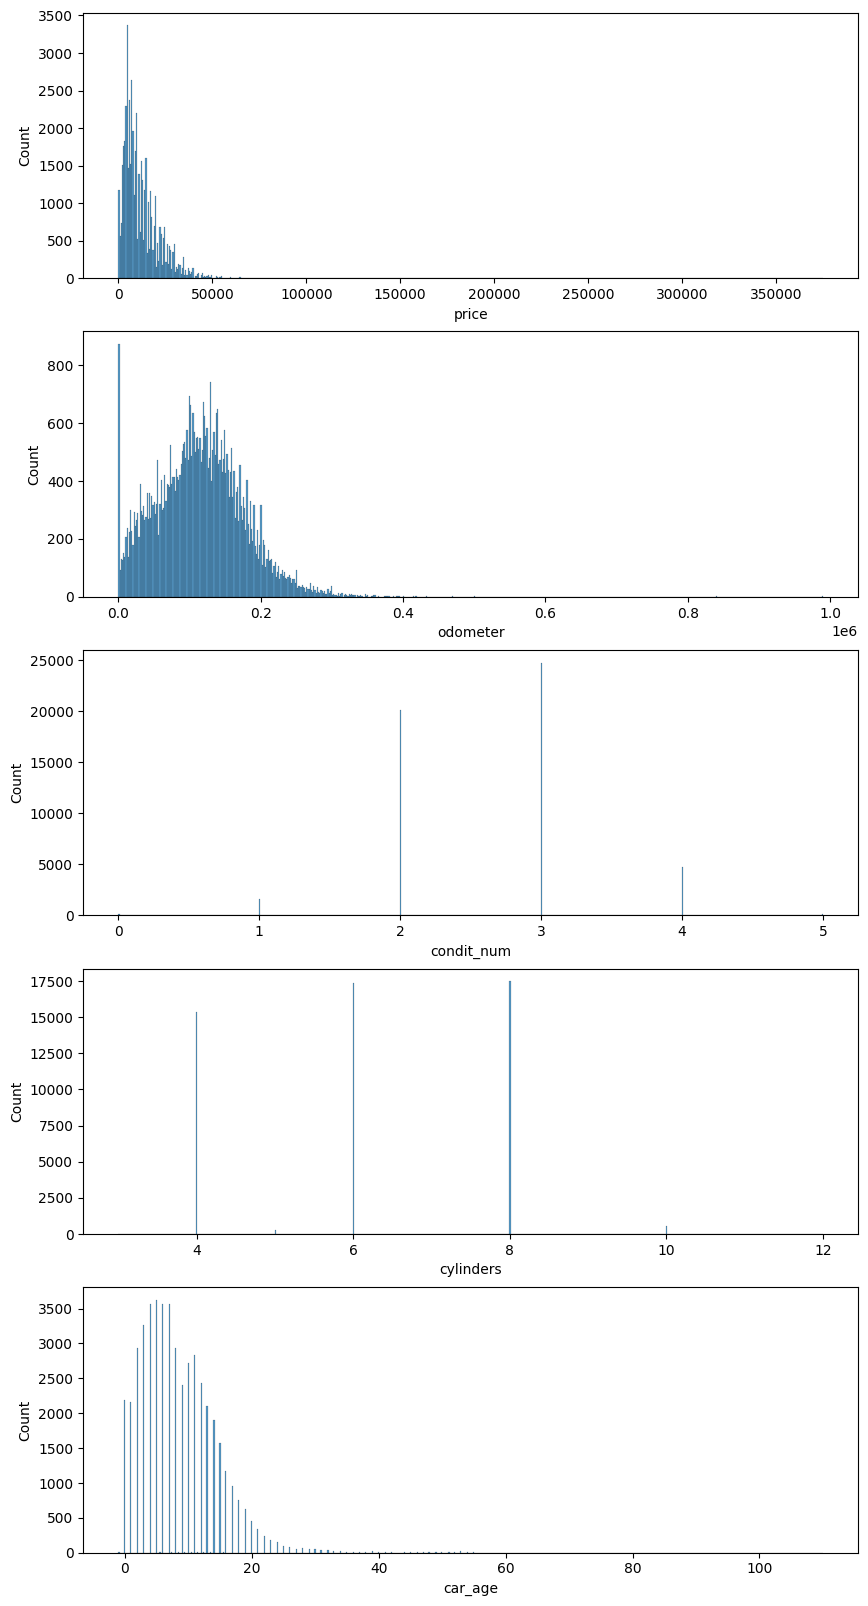

In [98]:
# aplicação da biblioteca plotly.express

plt.rcParams['figure.figsize'] = (10,20)
names = ['price', 'odometer', 'condit_num', 'cylinders', 'car_age']

def create_histogram(names, data, sharex=True):
    fig,ax = plt.subplots(len(names),1)
    for name, _ax in zip(names, ax):
        sns.histplot(data[name].dropna(), bins=600, ax=_ax)
    plt.show()
    
create_histogram(names, df_cars)

Ainda temos ocorrências com preço de 1, o carro não pode ter o preço tão baixo. Vamos dar uma olhada nessa fatia de dados.

**Conclusão intermediária**
- Preço: O histograma tem a cauda longa até 375000;
- A idade do veículo quando a propaganda foi colocada: Por volta de 2100 linhas perto de zero idade e a cauda até 110 anos;
- Quilometragem: 897 ocorrências perto de zero, delas 187 igual à zero e tem cauda muito longe com valores altos até 990000 km;
- Número de cilindros: Já verificamos em cima,de 3 até 12 cilindros, sem anomalidades aparentes;
- Condição: Parece a distribuição normal, sem anomalidades aparentes.

Após dar uma ohlada nos histogramas de dados brutos vamos voltar na questão de procurar as duplicatas não tâo óbvias. Afinal, isto é o site de propaganda grátis com milhares de usuários preenchendo os campos e nem sempre com a internet funcionando 100%.

*Hipotese*

*O cliente do site fez várias tentativas sem êxito de vender um carro e postou vários anúncios do mesmo carro em datas diferentes na coluna `date_posted`. Nesse caso cada anúncio do mesmo carro não seria a ocorrência independente e válida para o esudo do comportamento do objeto 'propaganda' desde que os fatores que influenciam o preço. Devemos transformar esse grupo de N linhas em uma linha com todos os fatores que influenciam o preço iguais, a última data e a mediana dos dias de permanecer no site.*

Para testar essa hipótese vamos fazer mais uma verificação agrupando por modelo, quilometragem, preço, cor e ano. Verificaremos, se veremos os grupos de mais de uma linha, nesse caso teremos os anúncios diferentes para o mesmo veículo. Para fazer esse passo mais fácil mudaremos agora o tipo de dados da coluna `date_posted` de string para Datetime.

In [99]:
fna = {'odometer': -1, 'paint_color': 'NA', 'model_year': -1}
df_cars = df_cars.fillna(fna)

In [100]:
parameters = ['model', 'odometer', 'paint_color', 'model_year', 'price']
duplicated = df_cars.groupby(by= parameters).agg(grp_size=('model', 'count'), median_days_list=('days_listed', 'median'), 
                                                 max_date_post=('date_posted', 'max')).sort_values(by='grp_size', ascending=False)
duplicated.head(10)

grp_size  \
model                             odometer  paint_color model_year price             
ford f150 supercrew cab xlt        47570.0  white       2016.0     27800        36   
chevrolet camaro lt coupe 2d       35807.0  black       2017.0     19700        30   
mercedes-benz benze sprinter 2500 -1.0      black       2013.0     34900        29   
ford mustang gt coupe 2d           42957.0  black       2017.0     25600        27   
                                   96562.0  red         2012.0     18600        26   
ford f150 supercrew cab xlt        73711.0  white       2014.0     22900        26   
                                   30339.0  brown       2017.0     30300        24   
ford econoline                     80836.0  white       2012.0     13490        23   
ford explorer                      137809.0 black       2008.0     5990         22   
nissan frontier crew cab sv        4998.0   white       2016.0     21900        21   

                                                                          median_days_list  \
model                             odometer  paint_color model_year price                     
ford f150 supercrew cab xlt        47570.0  white       2016.0     27800              28.5   
chevrolet camaro lt coupe 2d       35807.0  black       2017.0     19700              35.5   
mercedes-benz benze sprinter 2500 -1.0      black       2013.0     34900              36.0   
ford mustang gt coupe 2d           42957.0  black       2017.0     25600              38.0   
                                   96562.0  red         2012.0     18600              28.0   
ford f150 supercrew cab xlt        73711.0  white       2014.0     22900              41.5   
                                   30339.0  brown       2017.0     30300              47.0   
ford econoline                     80836.0  white       2012.0     13490              34.0   
ford explorer                      137809.0 black       2008.0     5990               35.5   
nissan frontier crew cab sv        4998.0   white       2016.0     21900              30.0   

                                                                         max_date_post  
model                             odometer  paint_color model_year price                
ford f150 supercrew cab xlt        47570.0  white       2016.0     27800    2019-04-13  
chevrolet camaro lt coupe 2d       35807.0  black       2017.0     19700    2019-04-17  
mercedes-benz benze sprinter 2500 -1.0      black       2013.0     34900    2019-04-18  
ford mustang gt coupe 2d           42957.0  black       2017.0     25600    2019-04-19  
                                   96562.0  red         2012.0     18600    2019-04-14  
ford f150 supercrew cab xlt        73711.0  white       2014.0     22900    2019-04-17  
                                   30339.0  brown       2017.0     30300    2019-04-18  
ford econoline                     80836.0  white       2012.0     13490    2019-03-30  
ford explorer                      137809.0 black       2008.0     5990     2019-04-19  
nissan frontier crew cab sv        4998.0   white       2016.0     21900    2019-04-10

Agrupamento por modelo, quilometragem e cor do veículo mostrou os grupos de ocorrências até 30 linhas com mesmo preço, tipo, codição, ano do modelo, etc. com único parametro diferente: a data de publicação de anúncio. Com isso podemos chegar na conclusão que essas ocorrências tratam-se do mesmo veículo, as várias tentativas do dono de vender o carro pelo mesmo preço. 

Consideraremos essas ocorrências como duplicadas e vamos tratar utilizando deixando só uma linha por carro com data de ultimo anuncio e a média dos dias de permanência de todos os anúncios do mesmo carro. Temos aqui um dos grupos da linha 5 do output da célula logo acima, o resultado do argupamento. 

Podemos observar que todas as linhas tem o mesmo condição, tipo de fuel, transmissão, tipo se é 4 por 4, condição. Todos os fatores que são iguais.

In [101]:
df_cars[(df_cars['model'] == "ford mustang gt coupe 2d") & (df_cars['model_year'] == 2012.0) 
        & (df_cars['paint_color'] == 'red') & (df_cars.price == 18600) 
        & (df_cars.odometer == 96562.0)].sort_values(by='date_posted', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_cat,year,month,weekday,car_age,annual_km,condit_num
984,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-04-14,44,50-99K,2019,4,6,7.0,47.83,2
17052,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-04-09,18,50-99K,2019,4,1,7.0,47.83,2
12204,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-03-31,18,50-99K,2019,3,6,7.0,47.83,2
29132,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-03-22,64,50-99K,2019,3,4,7.0,47.83,2
46528,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-03-08,22,50-99K,2019,3,4,7.0,47.83,2
10908,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-02-03,13,50-99K,2019,2,6,7.0,47.83,2
47558,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-01-29,16,200K+,2019,1,1,7.0,47.83,2
44396,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2019-01-28,4,50-99K,2019,1,0,7.0,47.83,2
13236,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2018-12-25,5,50-99K,2018,12,1,6.0,47.85,2
162,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0,2018-12-20,14,50-99K,2018,12,3,6.0,47.85,2


In [102]:
cars_extended = df_cars.join(duplicated, on=parameters).copy()
cars_extended.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,odometer_cat,year,month,weekday,car_age,annual_km,condit_num,grp_size,median_days_list,max_date_post
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NA,...,100-149K,2018,6,5,7.0,71.85,2,1,19.0,2018-06-23
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,50-99K,2018,10,4,4.0,43.96,2,2,32.0,2018-10-19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,100-149K,2019,2,3,6.0,54.48,4,2,77.0,2019-02-24
3,1500,2003.0,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,NA,...,200K+,2019,3,4,16.0,87.91,1,1,9.0,2019-03-22
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,50-99K,2019,4,1,2.0,40.07,3,3,28.0,2019-04-02


In [103]:
print((cars_extended['grp_size']>1).sum())
round((cars_extended['grp_size']>1).sum() / cars_extended.shape[0], 2)

14035


0.27

Então, 12828 ocorrências, 25% do conjunto total pertencem ao algum grupo do referente ao mesmo carro. Teremos que dar tratamento ao um quarto dos dados.

Lembrando que agrupamos por ano do carro, modelo, quilometragem, preço e cor. Agora vamos adicionar o tamanho do grupo no conjunto original armazenado na nova coluna `gpr_size`. Nessa coluna significa que existe só 1 anúncio desse carro, a partir de 2 teremos que dar o tratamento. Mais duas novas colunas `median_days_list` e `max_date_post` armazenam respectivamente a mediana dos dias de permanência dos anúncios de 1 carro e a data do último anúncio desse carro. Manteremos o index original na coluna `index`.

Após deletar as duplicatas, o nosso conjunto irá conter somente 1 linha representando o carro, a data do último anúncio e a média dos dias da permanência dos anúncios desse carro no site. Por último copiaremos o conteúdo dessas colunas na linha permanecente para as colunas `days_listed` e `date_posted`.

Antes de remover as duplicatas, precisamos ter certeza que a linha que vai representar o grupo do mesmo carro para a análise futura conter todos os valores válidos. Eliminamos as linhas com valores ausentes do conjunto. Se o tamanho do grupo é maior que 1, o carro tem duplicatas e precisamos remover as linhas com valores ausentes.

In [104]:
cars_extended = cars_extended.drop_duplicates(subset=parameters, keep='first').reset_index()
cars_extended.tail()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,...,odometer_cat,year,month,weekday,car_age,annual_km,condit_num,grp_size,median_days_list,max_date_post
42158,51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,...,50-99K,2018,10,2,5.0,43.67,4,1,37.0,2018-10-03
42159,51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,...,150-199K,2018,11,2,16.0,89.94,0,1,22.0,2018-11-14
42160,51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,...,100-149K,2018,11,3,9.0,63.43,3,1,32.0,2018-11-15
42161,51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,...,100-149K,2018,7,0,5.0,69.16,2,1,71.0,2018-07-02
42162,51524,6300,2014.0,nissan altima,good,4.0,gas,99253.0,automatic,sedan,...,200K+,2018,6,1,4.0,49.18,2,1,10.0,2018-06-05


In [106]:
cars_extended.loc[cars_extended.odometer == -1, 'odometer'] = np.nan
cars_extended.loc[cars_extended.model_year == -1, 'model_year'] = np.nan
cars_extended.loc[cars_extended.paint_color == "NA", 'paint_color'] = None

In [108]:
cars_extended.loc[cars_extended['grp_size'] >1, 'days_listed'] = cars_extended[cars_extended['grp_size'] > 1]['median_days_list']

In [109]:
cars_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42163 entries, 0 to 42162
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             42163 non-null  int64         
 1   price             42163 non-null  int64         
 2   model_year        40099 non-null  float64       
 3   model             42163 non-null  object        
 4   condition         42163 non-null  object        
 5   cylinders         41836 non-null  float64       
 6   fuel              42163 non-null  object        
 7   odometer          41581 non-null  float64       
 8   transmission      42163 non-null  object        
 9   type              42163 non-null  object        
 10  paint_color       33697 non-null  object        
 11  is_4wd            42163 non-null  int64         
 12  date_posted       42163 non-null  datetime64[ns]
 13  days_listed       42163 non-null  float64       
 14  odometer_cat      4216

### **Conclusão**

Avaliamos os primeiros histogramas, precisamos remover as caudas e tratar dos picos baseando-se na nossa análise. Tiramos as duplicatas não óbvias, agora temos 43128 linhas contendo a informação sobre os carros 'únicos'.

Temos as 6 novas colunas que vamos manter e usar na análise: `year`, `month`, `weekday`, `car_age`, `annual_km`, `condit_num`.

Temos ainda 3 colunas de apoio resultantes do join no agrupamento para remover os anúncios dos mesmos carros: `grp_size`, `median_days_list`e `max_date_post`. Apesar de fato que a informação necessária ja foi copiada para as colunas `date_posted` e `days_listed`, vamos manter essas colunas por enquanto. Removeremos antes da etapa da análise dos dados limpos.

O próximo passo seria estudar dos valores atípicos e cuidar dos valores ausentes remanescentes.

### Valores atípicos

Vamos definir os limites inferiores/superiores somente para os parâmetros numéricos: `price`, `odometer`, `car_age` (`cylinders` e `condition` são categóricos). Criaremos o conjunto de dados filtrado sem os valores atípicos.

In [110]:
cars_extended.describe()

,index,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year,month,weekday,car_age,annual_km,condit_num,grp_size,median_days_list,max_date_post
count,42163.000000,42163.000000,40099.000000,41836.000000,41581.000000,42163.000000,42163,42163.000000,42163.000000,42163.000000,42163.000000,40099.000000,41581.000000,42163.000000,42163.000000,42163.000000,42163
mean,24876.598084,11553.824182,2009.320407,6.045654,118760.332796,0.479781,2018-10-25 03:10:18.086948352,39.384259,2018.308280,6.619904,3.008633,8.987980,58.841607,2.644309,1.221901,39.384259,2018-11-02 12:47:17.103621376
min,0.000000,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,2018-05-01 00:00:00
25%,11785.500000,4990.500000,2006.000000,4.000000,75890.000000,0.000000,2018-07-29 00:00:00,20.000000,2018.000000,3.000000,1.000000,4.000000,37.600000,2.000000,1.000000,20.000000,2018-08-07 00:00:00
50%,24562.000000,8690.000000,2010.000000,6.000000,117854.000000,0.000000,2018-10-25 00:00:00,33.000000,2018.000000,7.000000,3.000000,8.000000,58.400000,3.000000,1.000000,33.000000,2018-11-06 00:00:00
75%,37698.000000,15495.000000,2014.000000,8.000000,157000.000000,1.000000,2019-01-21 00:00:00,53.000000,2019.000000,10.000000,5.000000,12.000000,77.780000,3.000000,1.000000,53.000000,2019-01-31 00:00:00
max,51524.000000,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,6.000000,110.000000,490.580000,5.000000,36.000000,271.000000,2019-04-19 00:00:00
std,14940.181094,9868.675006,6.465639,1.648442,63425.111046,0.499597,NaN,27.320507,0.461788,3.475007,1.999009,6.476874,31.425099,0.731405,0.995506,27.320507,NaN


In [111]:
parameters = ['price', 'odometer', 'car_age']

def limit_inferior(parameter):
    limits_inf = {}
    for parameter in parameters:
        # o que seria khru?
        khru = cars_extended[parameter].describe()['25%'] - 1.5*(cars_extended[parameter].describe()['75%']- cars_extended[parameter].describe()['25%'])
        limits_inf[parameter] = khru
    return limits_inf
limits_inf = limit_inferior(parameters)
limits_inf 

{'price': -10766.25, 'odometer': -45775.0, 'car_age': -8.0}

In [112]:
parameters = ['price', 'odometer', 'car_age']

def limit_superior(parameter):
    limits_sup = {}
    for parameter in parameters:
        khru2 = cars_extended[parameter].describe()['75%'] + 1.5*(cars_extended[parameter].describe()['75%']- cars_extended[parameter].describe()['25%'])
        limits_sup[parameter] = khru2
    return limits_sup
        
limits_sup = limit_superior(parameters) 
limits_sup

{'price': 31251.75, 'odometer': 278665.0, 'car_age': 24.0}

Temos os limites superiores para `price`, `odometer` e `car_age`, vamos usá-los para filtrar o nosso dataframe sem outliers.

No entanto, os limites inferiores apresentam os valores negativos para os parâmetros que podem ser somente positivos e eles estão positivos conforme a estatística descritiva do conjunto original:
- price = min 1
- odometer -> min 0
- car_age -> min 0

**DOIS PROBLEMAS**

1) se o limite inferior para todo o conjunto não faz sentido, será que vai funcionar achar o limite inferior para o grupo menor?
2) precisamos estudar mais fundo os picos em volta de O nos histogramas das colunas `price` e `odometer`, e os valores perto de zero na coluna `car_age`.


*Hipótese*

*O carro de zero quilometragem, zero de idade seria o carro novo. Vamos verificar se a idade do carro (ou `model_year`) dessa população de 1578 ocorrências é igual ao ano de puplicação de propaganda. Nesse caso deixaremos dentro do conjunto da análise como a ocorrência válida.*

In [113]:
cars_zero = cars_extended.query('odometer == 0' and 'car_age == 0').copy()
cars_zero['ind_zero'] =  cars_zero['model_year'] - cars_zero['year']
cars_zero['ind_zero'].describe()

count    1578.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ind_zero, dtype: float64

Hipátese confirmada, 1578 ocorrências podem ser considerados os carros novos e continuam como os valores válidos para a futura análise.

Filtraremos os valores atípicos do conjunto original pelo limite superior calculado e o limite inferior igual ao zero. Verificaremos a informação geral do conjunto sem valores atípicos.

In [116]:
cars_extended.query('price == 1').price.count()

320

Ainda temos 320 ocorrências com preço do carro igual à 1, o valor fora da realidade do fenômeno. O anunciante poderia errar na hora de preencher esse campo ou foram alguns anúncios - testes no próprio departamento de marketing não removidos. Vamos remover essas ocorrências.

In [115]:
price_sup = limits_sup['price']
odometer_sup = limits_sup['odometer']
car_age_sup = limits_sup['car_age']

In [117]:
good_cars = cars_extended[(cars_extended.price.fillna(0) <= price_sup) & (cars_extended.odometer.fillna(0) <= odometer_sup) 
                          & (cars_extended.car_age.fillna(0) <= car_age_sup) & (cars_extended.price != 1 )]

good_cars = good_cars.drop(columns = ['grp_size', 'median_days_list', 'max_date_post', 'odometer_cat'])
good_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38840 entries, 0 to 42162
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         38840 non-null  int64         
 1   price         38840 non-null  int64         
 2   model_year    36915 non-null  float64       
 3   model         38840 non-null  object        
 4   condition     38840 non-null  object        
 5   cylinders     38546 non-null  float64       
 6   fuel          38840 non-null  object        
 7   odometer      38322 non-null  float64       
 8   transmission  38840 non-null  object        
 9   type          38840 non-null  object        
 10  paint_color   31070 non-null  object        
 11  is_4wd        38840 non-null  int64         
 12  date_posted   38840 non-null  datetime64[ns]
 13  days_listed   38840 non-null  float64       
 14  year          38840 non-null  int32         
 15  month         38840 non-null  int32      

**Conclusão Intermediaria**<br>

O conjunto filtrado tem 42162 linhas e 20 colunas. <br>

### Parâmetros fundamentais sem valores atípicos

Após tirar as ocorrências atípicas do conjunto de dados vamos estudar e verificar a amplitude de dados e frequeência de valores únicos.

In [118]:
good_cars.describe()

,index,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year,month,weekday,car_age,annual_km,condit_num
count,38840.000000,38840.000000,36915.000000,38546.000000,38322.000000,38840.000000,38840,38840.000000,38840.000000,38840.000000,38840.000000,36915.000000,38322.000000,38840.000000
mean,24952.367225,10402.742456,2009.513409,5.943314,119990.335682,0.459964,2018-10-24 18:15:36.519052800,39.358187,2018.306540,6.628321,3.007389,8.793295,59.451083,2.634217
min,0.000000,3.000000,1994.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,-1.000000,0.000000,0.000000
25%,11934.750000,4995.000000,2006.000000,4.000000,81500.000000,0.000000,2018-07-29 00:00:00,20.000000,2018.000000,3.000000,1.000000,5.000000,40.390000,2.000000
50%,24650.500000,8495.000000,2010.000000,6.000000,120000.000000,0.000000,2018-10-24 00:00:00,33.000000,2018.000000,7.000000,3.000000,8.000000,59.460000,3.000000
75%,37751.250000,14500.000000,2014.000000,8.000000,157500.000000,1.000000,2019-01-21 00:00:00,53.000000,2019.000000,10.000000,5.000000,12.000000,78.050000,3.000000
max,51524.000000,31250.000000,2019.000000,12.000000,278600.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,6.000000,24.000000,138.060000,5.000000
std,14946.664365,7059.978647,5.204711,1.632012,56204.355306,0.498401,NaN,27.304543,0.461062,3.470282,1.996333,5.215658,27.847543,0.718321


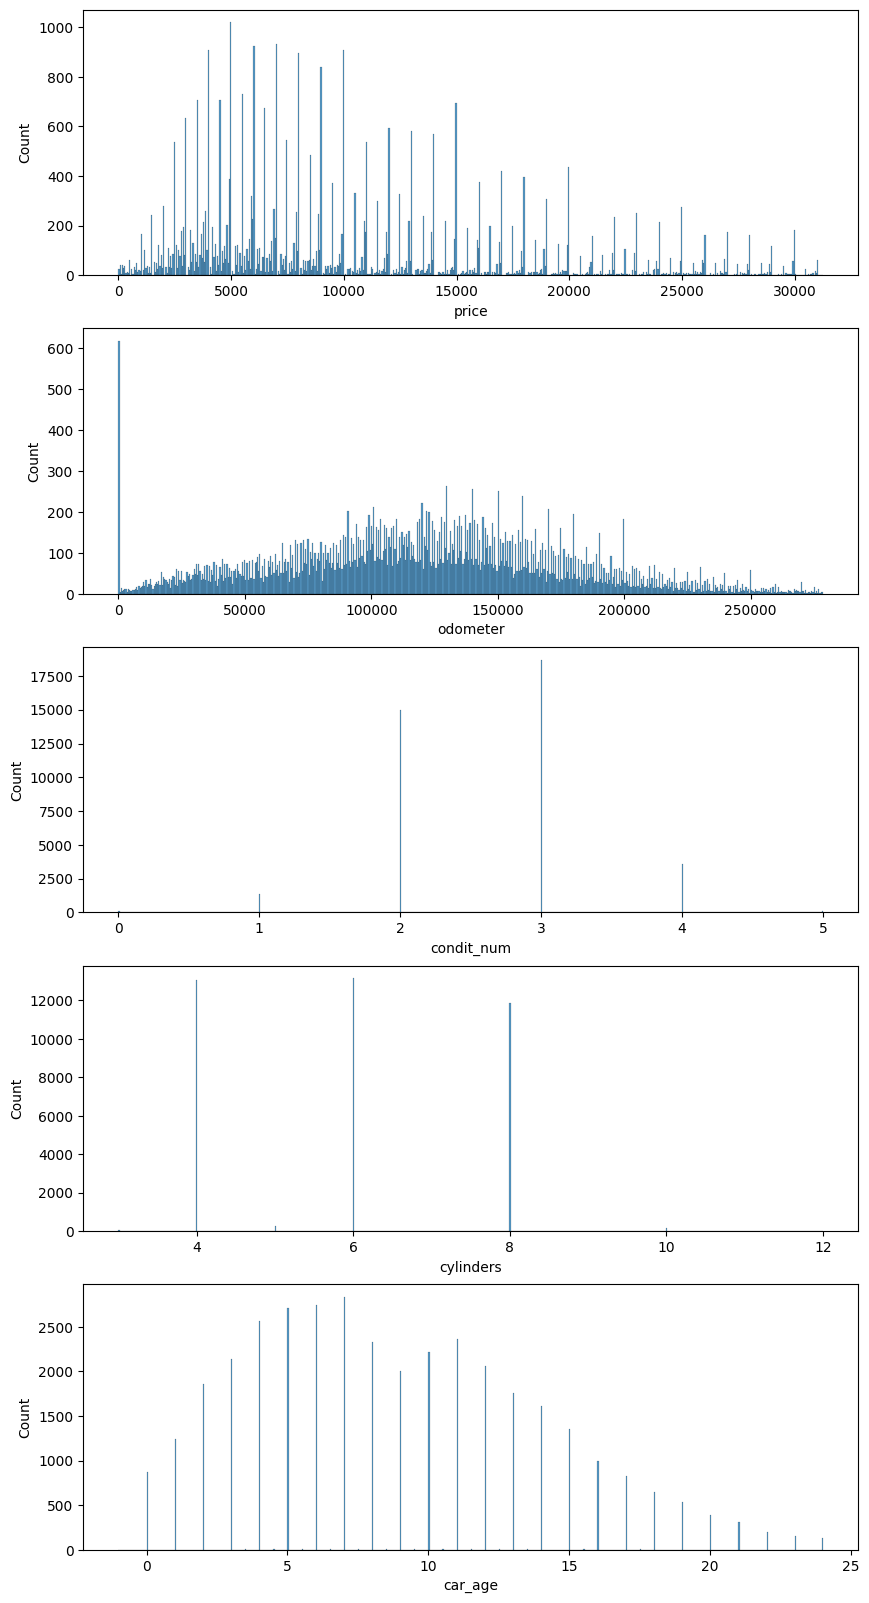

In [119]:
plt.rcParams['figure.figsize'] = (10,20)
create_histogram(names, good_cars)

Análise dos histrogramas acima:
- Preço: Agora, sem os valores atípicos não temos cáuda, máximo em 1000 ocorrências de 5000, agora sem picos aparentes;
- Quilometragem: Sem os valores atípicos não temos cáuda, 600 ocorrências de kilometragem zero tratam-se de carros novos, máximo em 250 ocorrências de 125000 km, agora sem outros picos aparentes;
- Idade do carro: Agora, sem os valores atípicos não temos cáuda, máximo em 2800 ocorrências de 7anos de idade, agora sem picos aparentes;
- Condição e Cilindros: Sem mudanças.

### Tempo de vida das propagandas

Partimos para o estudo da exibição das propagandas através da verificação da média e mediana dos dias de permanência no site. Vamos ver o que é a vida útil de uma propagamda típica e a exibição anormal muito longa ou muito curta, faremos o cálculo dos limites superior e inferior.

In [120]:
good_cars['days_listed'].describe()

count    38840.000000
mean        39.358187
std         27.304543
min          0.000000
25%         20.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [121]:
good_cars['days_listed'].value_counts().sort_index()

days_listed
0.0       39
1.0      115
2.0      163
3.0      263
3.5        1
        ... 
244.0      1
252.0      1
256.0      1
267.0      1
271.0      1
Name: count, Length: 315, dtype: int64

In [124]:
days_listed_inf = good_cars['days_listed'].describe()['25%'] - 1.5*(good_cars['days_listed'].describe()['75%']- good_cars['days_listed'].describe()['25%'])
days_listed_sup = good_cars['days_listed'].describe()['75%'] + 1.5*(good_cars['days_listed'].describe()['75%']- good_cars['days_listed'].describe()['25%'])

print(days_listed_inf)

days_listed_sup

-29.5


102.5

A média da permanência de um anúncio no site é de 39.34 dias, a mediana de 33 dias, as propagandas ficaram por tempo muito longo quando passou de 103 dias, o limite superior. O fenômeno só pode ser expresso em números positivos de dias, logo o limite superior de 30.75 dias negativos não faz sentido. A permanência no site de 0 dias, tirado no mesmo dia pode ser considerada curta.

### Quantidade das propagandas por cada tipo de veículo¶

Analisaremos o número de propagandas e o preço médio para cada tipo de veículo. Para essa finalidade construimos o gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo.

In [125]:
good_cars_pivot = good_cars.pivot_table(index='type', values='date_posted', aggfunc='count').sort_values(by='date_posted', ascending=False)
print(good_cars_pivot)

             date_posted
type                    
sedan              10405
SUV                 9833
truck               8114
pickup              5026
coupe               1379
mini-van            1036
wagon               1011
hatchback            888
van                  460
convertible          306
other                208
offroad              162
bus                   12


<Axes: xlabel='type'>

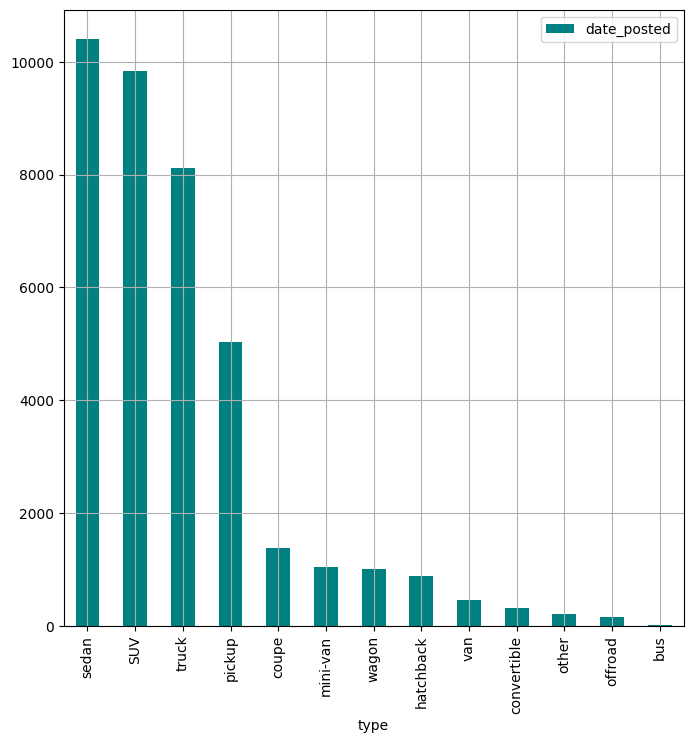

In [131]:
good_cars_pivot.plot(kind='bar', color="teal", figsize=(8,8), grid=True)

As categorias mais populares são sedan com 10475 anúncios e SUV com 9927 anúncios, responsáveis por 49% do conjunto. Vamos verificar se os fatores a idade do carro, a quilometragem, a condição, a transmissâo e a cor influenciam os preços de cada dessas categorias com maiores números de propaganda.

## Análise dos fatores de preço

Com o conjunto de dados limpos e os dois tipos de carro mais populares vamos verificar se preço do veículo anunciado depende dos fatores tais como idade do carro, quilometragem, tipo de transmissão, a condição e a cor. São 2 fatores numéricos e 3 categóricos para dois tipos de carro mais populares. 

Para evitar os duplicamentos de código, automatizaremos a criação dos gráficos. Usaremos o gráfico da dispersão, a ferramenta que permite visualizarmos com clareza a correlação entre duas variáveis. 

Vamos construir também o gráfico de extremos e quartis para as variáveis categoricas cor e tipo de transmissão. Usaremos a matriz de correlação e dos gráficos de correlação para confirmar a dependência do preço de um ou mais fatores listados.

In [139]:
good_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38840 entries, 0 to 42162
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         38840 non-null  int64         
 1   price         38840 non-null  int64         
 2   model_year    36915 non-null  float64       
 3   model         38840 non-null  object        
 4   condition     38840 non-null  object        
 5   cylinders     38546 non-null  float64       
 6   fuel          38840 non-null  object        
 7   odometer      38322 non-null  float64       
 8   transmission  38840 non-null  object        
 9   type          38840 non-null  object        
 10  paint_color   31070 non-null  object        
 11  is_4wd        38840 non-null  int64         
 12  date_posted   38840 non-null  datetime64[ns]
 13  days_listed   38840 non-null  float64       
 14  year          38840 non-null  int32         
 15  month         38840 non-null  int32      

In [152]:
good_cars.query('type =="SUV"').corr(method='pearson', numeric_only=True)

,index,price,model_year,cylinders,odometer,is_4wd,days_listed,year,month,weekday,car_age,annual_km,condit_num
index,1.000000,-0.020035,-0.027995,-0.000370,0.043328,0.019138,0.004994,-0.002003,-0.009217,-0.019934,0.027719,0.043337,-0.032870
price,-0.020035,1.000000,0.679643,-0.031540,-0.604268,0.108005,-0.018834,0.002973,-0.005753,0.025253,-0.677721,-0.604262,0.318749
model_year,-0.027995,0.679643,1.000000,-0.347793,-0.635845,-0.090616,-0.019248,0.015439,-0.020935,0.013246,-0.995835,-0.635849,0.339110
cylinders,-0.000370,-0.031540,-0.347793,1.000000,0.308448,0.120193,0.022677,-0.010687,0.010199,-0.007763,0.345791,0.308453,-0.127504
odometer,0.043328,-0.604268,-0.635845,0.308448,1.000000,0.038378,0.014144,-0.014421,0.017114,-0.010289,0.632994,1.000000,-0.321508
is_4wd,0.019138,0.108005,-0.090616,0.120193,0.038378,1.000000,-0.007836,-0.013295,0.000690,0.023384,0.088864,0.038380,-0.027865
days_listed,0.004994,-0.018834,-0.019248,0.022677,0.014144,-0.007836,1.000000,0.003212,-0.007621,-0.008328,0.019487,0.014144,-0.010953
year,-0.002003,0.002973,0.015439,-0.010687,-0.014421,-0.013295,0.003212,1.000000,-0.818224,-0.014930,0.075786,-0.014931,0.003107
month,-0.009217,-0.005753,-0.020935,0.010199,0.017114,0.000690,-0.007621,-0.818224,1.000000,0.017864,-0.053796,0.017531,-0.001751
weekday,-0.019934,0.025253,0.013246,-0.007763,-0.010289,0.023384,-0.008328,-0.014930,0.017864,1.000000,-0.014780,-0.010281,0.009659


In [153]:
good_cars.query('type =="SUV"').corr(method='pearson', numeric_only=True)

,index,price,model_year,cylinders,odometer,is_4wd,days_listed,year,month,weekday,car_age,annual_km,condit_num
index,1.000000,-0.020035,-0.027995,-0.000370,0.043328,0.019138,0.004994,-0.002003,-0.009217,-0.019934,0.027719,0.043337,-0.032870
price,-0.020035,1.000000,0.679643,-0.031540,-0.604268,0.108005,-0.018834,0.002973,-0.005753,0.025253,-0.677721,-0.604262,0.318749
model_year,-0.027995,0.679643,1.000000,-0.347793,-0.635845,-0.090616,-0.019248,0.015439,-0.020935,0.013246,-0.995835,-0.635849,0.339110
cylinders,-0.000370,-0.031540,-0.347793,1.000000,0.308448,0.120193,0.022677,-0.010687,0.010199,-0.007763,0.345791,0.308453,-0.127504
odometer,0.043328,-0.604268,-0.635845,0.308448,1.000000,0.038378,0.014144,-0.014421,0.017114,-0.010289,0.632994,1.000000,-0.321508
is_4wd,0.019138,0.108005,-0.090616,0.120193,0.038378,1.000000,-0.007836,-0.013295,0.000690,0.023384,0.088864,0.038380,-0.027865
days_listed,0.004994,-0.018834,-0.019248,0.022677,0.014144,-0.007836,1.000000,0.003212,-0.007621,-0.008328,0.019487,0.014144,-0.010953
year,-0.002003,0.002973,0.015439,-0.010687,-0.014421,-0.013295,0.003212,1.000000,-0.818224,-0.014930,0.075786,-0.014931,0.003107
month,-0.009217,-0.005753,-0.020935,0.010199,0.017114,0.000690,-0.007621,-0.818224,1.000000,0.017864,-0.053796,0.017531,-0.001751
weekday,-0.019934,0.025253,0.013246,-0.007763,-0.010289,0.023384,-0.008328,-0.014930,0.017864,1.000000,-0.014780,-0.010281,0.009659


Análise das tabelas acima:
- O tipo de carro 'sedan' tem a correlação negativa bastante forte entre preço e idade do carro (-0.66) e entre preço e kilometragem(-0.58). Existe correlação positiva entre o preço e a condição do carro (0.31);
- O tipo de carro 'SUV' tem a correlação negativa bastante forte entre preço e idade do carro (-0.64) e entre preço e kilometragem(-0.57). Existe correlação positiva entre o preço e a condição do carro (0.30);
- O preço dos ambos tipos de carro se comporta de maneira muito parecida em relação dos fatóres numéricos.

Vamos construir os gráficos de dispersão para verificar essa correlação para fatores numéricos kilometragem e a idade do carro. O gráfico de diospersão com hexágonos pode nos mostrar a maior frequência de ocorrências com certo valor pela intensidade de cor.<br>

In [137]:
parameters_hexbin = ['car_age', 'odometer']

def create_hexbin_plot(parameter, car_type):
    for parameter in parameters_hexbin:
        good_cars.query(f'type == "{car_type}"').plot(kind='hexbin', 
                                                      x=parameter, 
                                                      y='price', 
                                                      sharex=False, 
                                                      gridsize=20, 
                                                      color='teal', 
                                                      figsize=(8,6), 
                                                      title= f"Correlação entre preço e {parameter} ({car_type})")

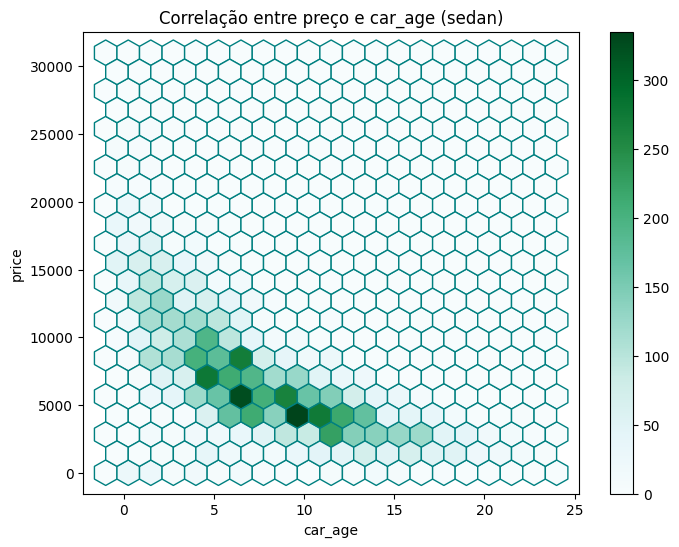

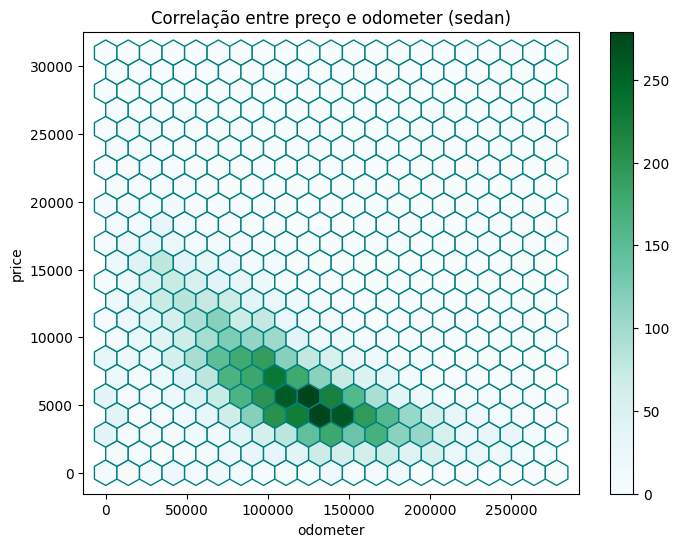

In [138]:
car_type = "sedan"        
create_hexbin_plot(parameters_hexbin, car_type)

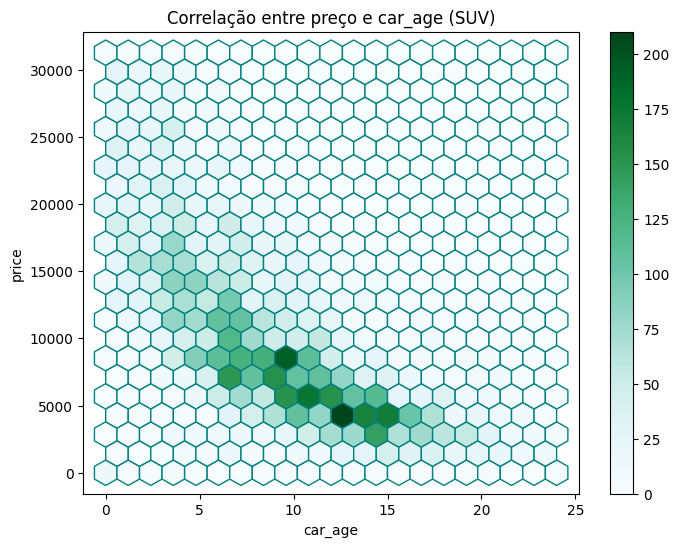

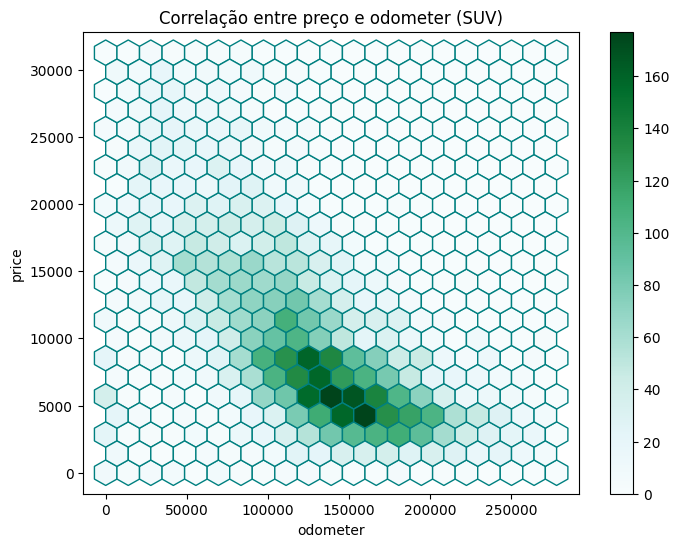

In [148]:
car_type = "SUV"        
create_hexbin_plot(parameters_hexbin, car_type)

Agora vamos verificar a relação ente o preço e fatores categóricos construindo os gráficos de extremos e quartis para avliar a dispersão: IQR e quantidade de valores atípicos fora dos limites inferior e superior. 

Lembrando que para continuarmos a análise temos que verificar se a quantidade das propagandas por agrupamento por fator seja maior que 50 para evitar que os grupos pequenos distorcem a análise.

**Conclusão intermediaria**

Nos gráfico de dispersão com hexágonos podemos observar que no tipo 'sedan' as ocorrências de preço se concentram nos carros entre 2 e 17 anos de idade com aumento forte até 300 ocorrências por combinação preço-ano entre 9-12 anos. O preço está caindo de 15000+ por carro de 3 anos até 3000 por carro de 17 anos com já mencionada concentração de valores entre 4000-9000 por carro de 9-12 anos. **Existe a correlação negativa entre preço e a idade do carro tipo 'sedan'.**

No mesmo tipo de gráfico podemos observar que no tipo 'SUV' as ocorrências de preço se concentram nos carros entre 2 e 17 anos de idade com aumento forte até 300 ocorrências por combinação preço-ano entre 9-12 anos. O preço está caindo de 15000+ por carro de 3 anos até 3000 por carro de 17 anos com já mencionada concentração de valores entre 4000-9000 por carro de 9-12 anos. **Existe a correlação negativa entre preço e a idade do carro tipo 'SUV'.**

Nos gráfico de dispersão com hexágonos podemos observar que no tipo 'sedan' as ocorrências de preço se concentram nos carros entre 40000 e 200000 de quilometragem com aumento significativo até 170-260 ocorrências por combinação preço-quilometragem entre 900000-150000 km. O preço está caindo de 11000+ por carro de 50000 km até 3000 por carro de 200000 km com já mencionada concentração de valores entre 3000-9000 por carro de 90000-150000 km. **Existe a correlação negativa entre preço e a quilometragem do carro tipo 'sedan'.**

No mesmo tipo de gráfico podemos observar que no tipo 'SUV' as ocorrências de preço se concentram nos carros entre 50000 e 210000 de quilometragem com aumento significativo até 140-180 ocorrências por combinação preço-quilometragem entre 100000-150000 km. O preço está caindo de 16000+ por carro de 50000 km até 3000 por carro de 210000 km com já mencionada concentração de valores entre 4000-9000 por carro de 100000-160000 km. **Existe a correlação negativa entre preço e a quilometragem do carro tipo 'SUV'.**

Apesar de comportamento bem parecido, em geral, os preços de sedan são um pouco menos dispersos em relação dos ambos fatores numéricos do que os preços de SUV. Os sedans são um pouco mais baratos que os SUV.

In [149]:
good_cars.query('type =="sedan"')['paint_color'].value_counts()

paint_color
silver    1738
black     1485
grey      1361
white     1268
blue      1045
red        792
brown      228
custom     208
green      175
purple      22
yellow      19
orange       9
Name: count, dtype: int64

In [160]:
parameters_boxplot = ['paint_color', 'transmission', 'condit_num']
# color = ['red', 'black', 'lightgrey', 'grey', 'darkgrey', 'purple', 'blue', 'green', 'brown']

def create_boxplot(parameter, car_type):
    for parameter in parameters_boxplot:
        listed_quantity = good_cars.groupby(by=['type', parameter])['days_listed'].transform('count') > 50
        plt.rcParams['figure.figsize'] = (10,4)
        fig, ax = plt.subplots(1,1)
        sns.boxplot(y = 'price', 
                    x = parameter, 
                    data = good_cars[listed_quantity].query(f'type == "{car_type}"'))

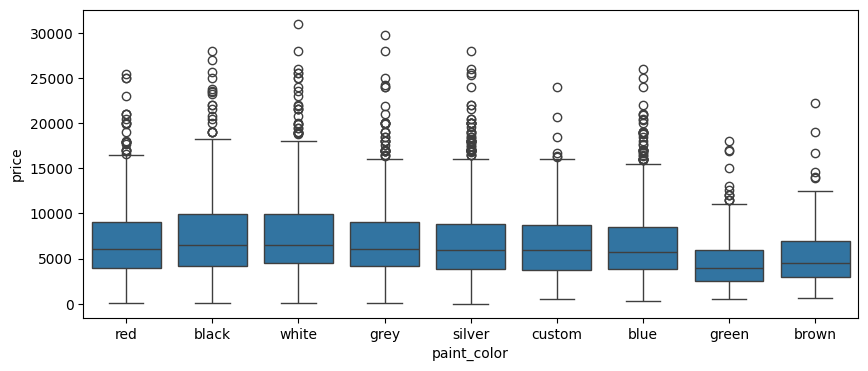

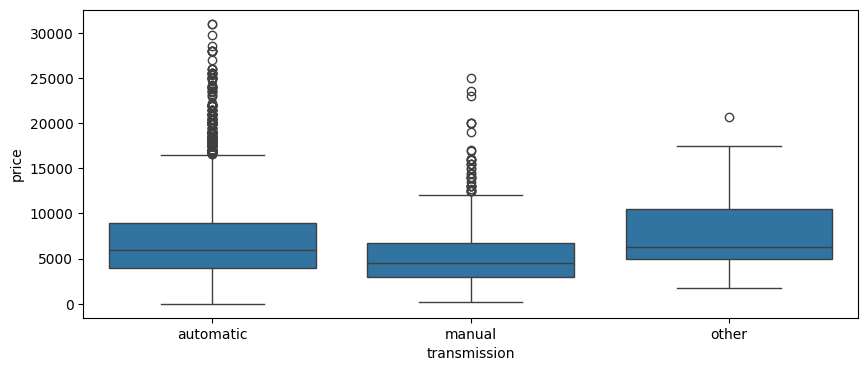

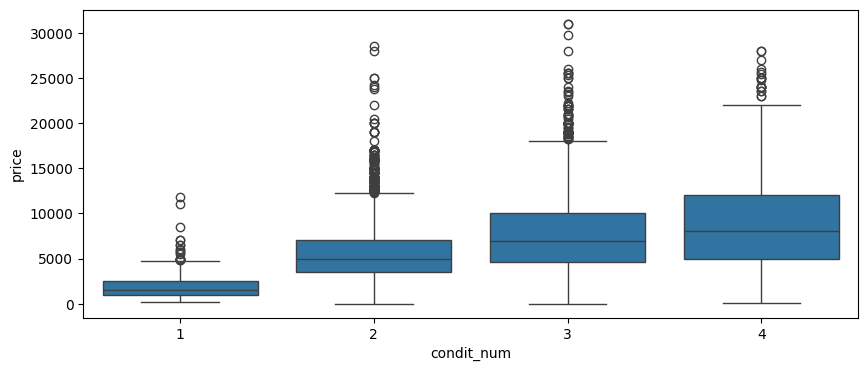

In [161]:
car_type = "sedan"
create_boxplot(create_boxplot, car_type)

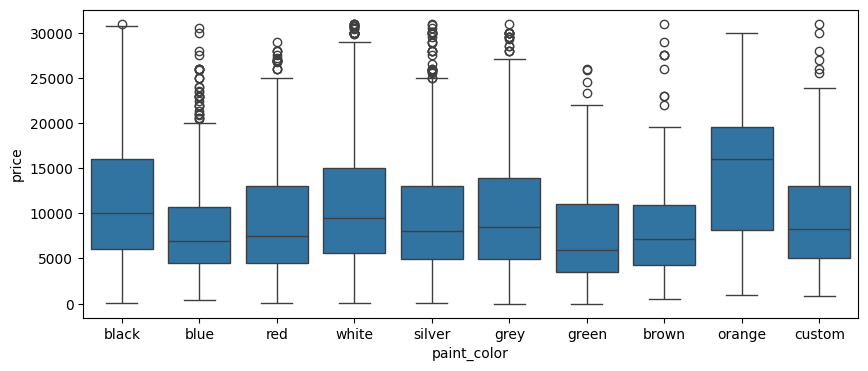

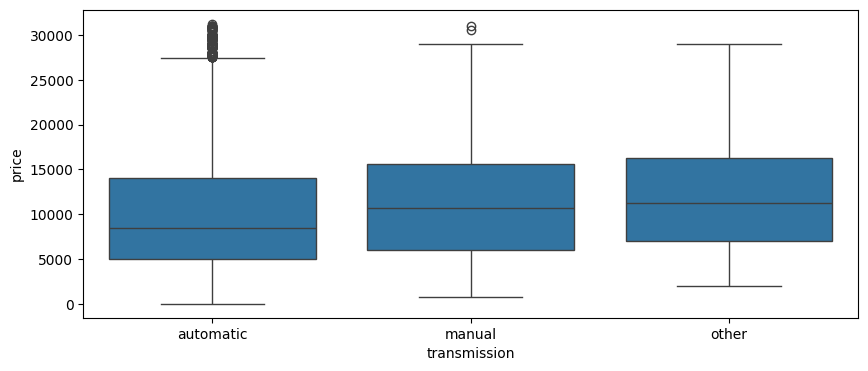

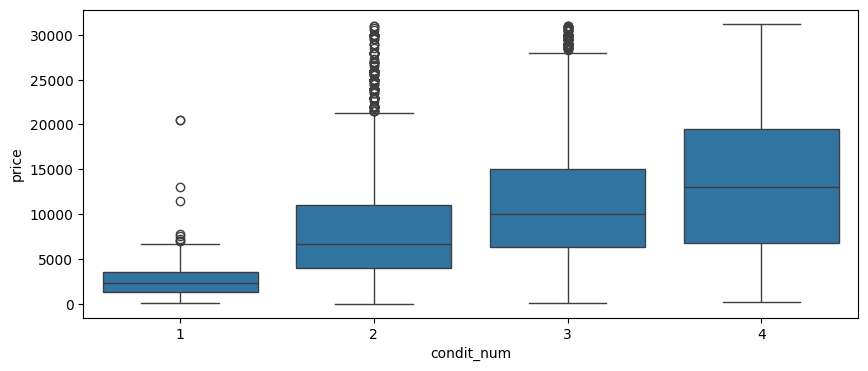

In [162]:
car_type = "SUV"        
create_boxplot(create_boxplot, car_type)

**Conclusão intermediaria**

No gráfico de extremos e quartis do fator condição podemos observar que os preços do tipo 'sedan' apresentam a subida da mediana de 1500 na condição razoável até 7995 na condição como novo. O IQR também aumenta de 1500 de razoável para 7000 do como novo. Todas as condições apresentam os valores atípicos fora do limite, os valores fora dos limites concentram mais nas condições bom e excelente. **Existe a correlação positiva entre a condição de carro e o preço do carro do tipo 'sedan'.**

No mesmo  tipo do gráfico também podemos observar que os preços do tipo 'SUV' apresentam a subida da mediana de 2250 na condição razoável até 12900 na condição como novo. O IQR  de razoável para 
12695 do como novo. Quanto aos valores atípicos, os razoáveis valores fora do limite, chegando na 20000, o intervalo fora do limite diminue para os bons, diminue mais ainda para os exelentes e, por último, a condição como novo não apresenta nenhum. **Existe a correlação positiva entre a condição de carro e o preço do carro do tipo 'SUV'.**

No gráfico de extremos e quartis do fator transmissão podemos observar que os preços do tipo 'sedan' apresentam a  mediana de 5999 e 6427 respectivamente para transmissão automatica e 'other'. A mediana do manual está mais baixa do que dessas duas com 4500. O IQR de automático está com 5005 do manual, com 3748 e do 'other' com 5474. Os carros manuais são mais baratos do que automáticos e 'other'. Quanto aos valores atípicos temos bastante valores fora do limite tanto nos automáticos, quanto nos manuáis. **Existe a correlação fraca negativa  entre o preço e o tipo de transmissão manual do tipo 'sedan'.**

No mesmo tipo do gráfico também podemos observar que os preços do tipo 'SUV' apresentam a mediana mais baixa de 8400 para automáticos, e bem parecidas de 10700 para manuais e de 11247 para 'other'. Os automáticos são mais baratos do que os automáticos e 'other'. O IQR do automático está com 8995, do manual com 9602 e do 'other' com 9173. Quanto aos valores atípicos temos alguns valores fora do limite no automático. **Existe a correlação fraca negativa entre o preço e o tipo de transmissão automatica  do tipo 'SUV'.**

No gráfico de extremos e quartis do fator cor podemos observar que os preços do tipo 'sedan' apresentam o comportamento da bastante uniforme por volta de 6000 entre os cores com mais de 50 anúncios, somente a mediana das cores verde e marrom está mais baixa por volta de 5000. O IQR também está uniforme. **Existe a correlação fraca negativa entre o preço do carro e as cores verde e marrom do tipo 'sedan'.**

No mesmo  tipo do gráfico também podemos observar que os preços do tipo 'SUV' na maioria das cores apresentam a mediana por lote de 7000-8000 e muitos valores atípicos fora do limite. As cores preto, laranja e branco apresentam a mediana maior de 10000-15000, IQR e o intervalo de tipicos maior e poucos valores fora do limite. A cor verde está com a mediana mais baixa de maioria, 5950.  **Existe a correlação fraca positiva entre o preço do carro e as cores preto, laranja e branco e fraca negativa com cor verde nos carros do tipo 'SUV'.**

Apesar de fato dar correlação positiva em todos fatores categóricos para ambos os tipos dos carros mais populares, os preços de 'sedan' são mais baixos que do 'SUV' e apresentam a disperção maior no fator condição e transmissão. Os 'SUVs' estão com preços mais altos no manual do que no automático, diferente dos 'sedans', onde automáticos são mais caros. Quanto à cor do carro os tipos apresentam o relação com preço bastante diferente: nos 'sedans' somente as cores verde e marrom são responsáveis pela correlação fraca negativa. No entanto, os 'SUVs' contam com correlação fraca positiva nas cores preto, laranja e branco, e correlação fraca negativa na cor verde. 

Para ilustrar as conclusões intermediárias até agora vamos criar a matriz da correlação que podenos mostrar de maneira resumida, em um chart só, a existencia da correlação negativa entre o preço dos ambos tipos de carro e a quilometragem e a idade, qual já discutimos acima.

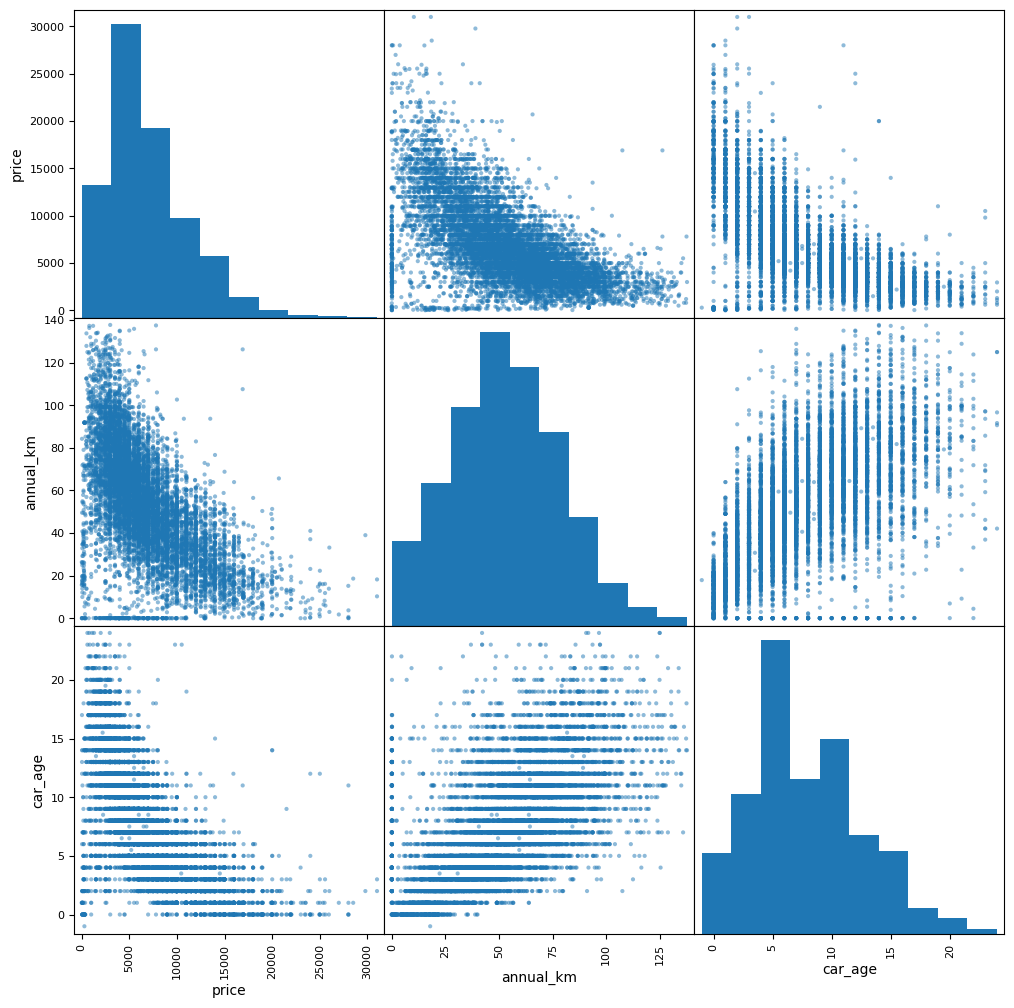

In [164]:
plt.rcParams['figure.figsize'] = (12,12)
pd.plotting.scatter_matrix(good_cars.query('type == "sedan"')[['price', 'annual_km', 'car_age']]);

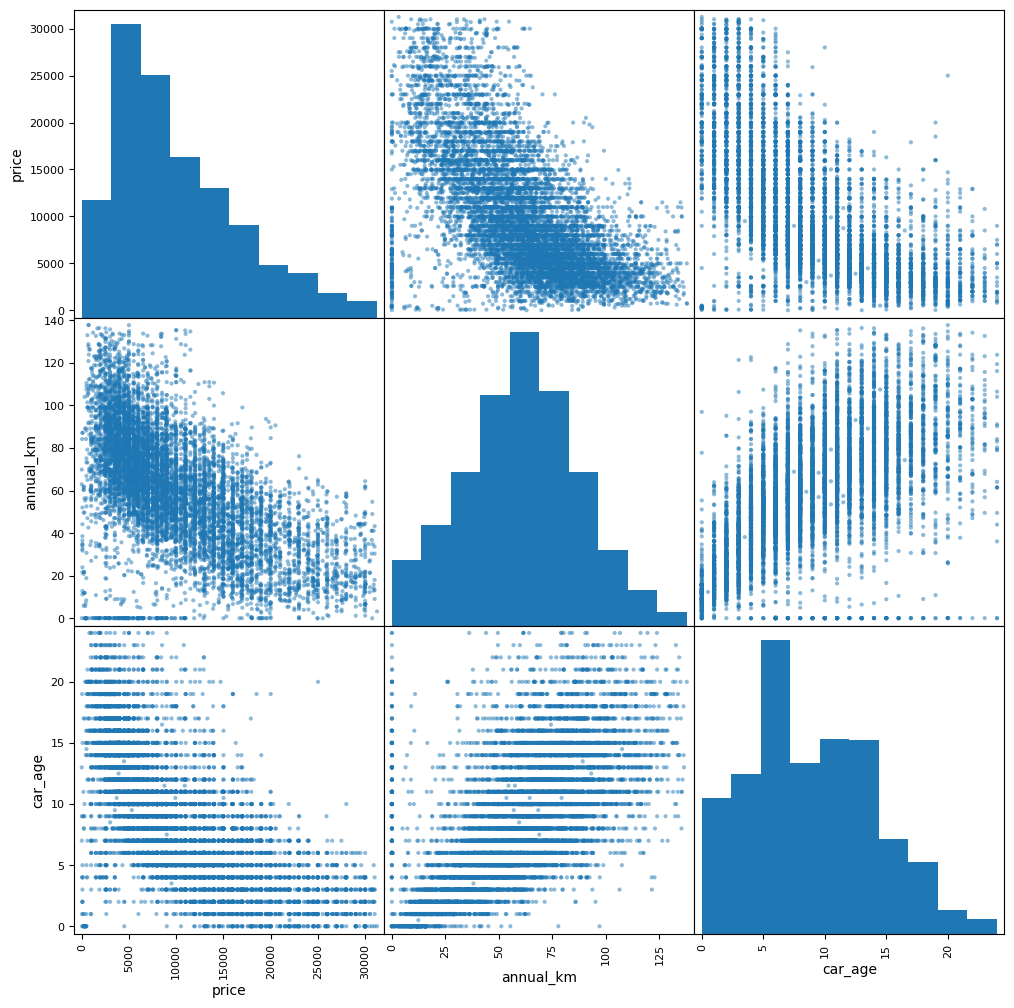

In [165]:
plt.rcParams['figure.figsize'] = (12,12)
pd.plotting.scatter_matrix(good_cars.query('type == "SUV"')[['price', 'annual_km', 'car_age']]);

# Conclusão geral

Centenas de propagandas gratuitas de veículos são publicadas no nosso site todos os dias. O objetivo desse estudo é determinar quais fatores influenciaram no preço de um veículo baseando-se nos dados coletados nos últimos anos no período de 05 de janeiro de 2018 até 19 de Abril de 2019.

Após o estudo da estrutura e qualidade dos dados, vamos limpar e preparar los para a análise do comportamento do objeto 'propaganda' no site, verificar o número de propagandas para cada tipo de veículo. Escolheremos alguns tipos dos veículos mais populares e estudaremos se preço do veículo anunciado depende dos fatores tais como idade do carro, quilometragem, tipo de transmissão, a condição e a cor.

O arquivo preparado pela equipe de marketing referente a publicação das propagandas gratuitas no site de venda dos carros de Lista de Eixo de Manivela os últimos anos contem **51525 linhas e 13 colunas.** As 13 colunas que armazenam 5125 linas as 4 colunas `model_year` (47906), `cylinders` (46265), `odometer` (43633), `is_4wd` (25572) e `paint_color`(42258) estão com quantidade de valores não nulos menor que a quantidade total das linhas no arquivo. As demais colunas do arquivo não apresentam os valores ausentes. O conjunto é assimétrico em relação aos valores ausentes, ou seja, que existem as linhas com mais de 1 valor ausente, por exemplo, 549 linhas com ano do carro e kilometragem zeradas.

*Tratamento de dados*
- O tipo de dados da coluna `date posted` foi mudado de string para formato de data. As colunas quilometragem, ano do carro e cilindros mudados para o número inteiro. Não foram detectadas as dupllicatas óbvias. Foram removidas 6 linhas do tipo de combustível 'electric'.

*Valores Ausentes*
- A média da participação dos valores ausentes avaliada por fatores está em acordância com a distribuição no conjunto original. Não achamos o padrão até agora leva à conclusão de auseêcia aleatória dos dados. Essa ausência pode ser resultado de um erro técnico. Partimos para o preenchimento dos valores ausentes por média ou mediana, o que servir melhor nas variáveis numéricas, quilometragem e ano do modelo. Vamos pensar nas outras abrdagens para nas variáveis categóricas.

*Preencimentos dos Valores Ausentes*
- A coluna `is4wd`, pois nela quase a metade dos valores estão nulos. Nessa coluna os valores são de tipo Booleano. A nossa hipótese é que os valores nulos foram o resultado do processamento errado. Por exemplo, em uma das etapas de ler o arquivo tipo .csv, os zeros nessa coluna se converteram em valores NaN. Iremos verificar os valores unicos na coluna. Se teremos somente 1 e NaN, vamos preencher os valores nulos na coluna `is4wd` com os zeros para manter o padrão do valor tipo booleano.
- Para cuidarmos dos valores ausentes de quantidade dos cilindros na coluna `cylinders`, vamos agrupar os carros por modelo, ano do carro e quantidade dos cilindros. Se o grupo tiver só um valor, ele serve para os outros carros desse modelo desse ano. Se o modelo num ano específico teria várias quantidades dos cilindros, preencheremos a informação faltante pela moda, o valor mais frequente no grupo. 
- As colunas `odometer` e `model_year` foram agrupados respectivamente por modelo do carro e ano do carro ou modelo e quilometragem para posterior preencimento dos dados ausentes aleatórios com respectiva mediana da quilometragem ou ano.
- Um quinto dos dados ausentes na coluna `paint_color` ficaram sem preenchimento.

Avaliamos os primeiros histogramas dos dados brutos precisamos remover as caudas e tratar dos picos baseando-se na nossa análise. Tiramos as duplicatas não óbvias, agrupadas por modelo, ano, transmissão, cor, quilometragem, tipo, preenchemos pela última dada de anúncio e mediana dos dias de permanência no site, agora temos 43128 linhas contendo a informação sobre os carros 'únicos'.
Temos as 6 novas colunas que vamos manter e usar na análise: `year`, `month`, `weekday`, `car_age`, `annual_km`, `condit_num`.

*Valores atípicos*
- Calculamos os limites inferior e superior para os fatores numérios kilometragem, idade do carro e idade. Os limites inferriores foram negativos, não podemos usar los par o phenômenos que somente podem ser expressos em números positivos. **Limites supelriores: quilometragem: 31252, idade: 278665, idade: 24.**

Após da filtragem por limite superior dos valores atípicos e remoção das 320 linhas com preço do carro irreal de 1, ficaram as 42162 linhas prontas armazenadas em 20 colunas para a análise no conjunto `good_cars`.

*Análise dos fatores do preço*
- Calculamos a quantidade pos anúncios por tipo de carro e escolhemos para a análise as duas categorias mais populares e representativas: **sedan com 10475 anuncios e SUV com 9927 anúncios**, responsáveis por 49 % do conjunto.
- Com o conjunto de dados limpo e os dois tipos de carro mais populares vamos verificar, se preço do veículo anunciado depende dos fatores tais como idade do carro, quilometragem, tipo de transmissão, a condição e a cor.
- São 2 fatores numéricos e 3 categóricos para dois tipos de carro mais populares. Pra evitar os duplicamentos de código, automatizaremos a criação dos gráficos.
- Usaremos o gráfico da dispersão, a ferramenta que permite visualizarmos com clareza a correlação entre duas variáveis. Vamos construir também o grafico de extremos e quartis para as variáveis categóricas cor e  tipo de transmissão.
- Usaremos a matriz de correlação e dos gráficos de correlação para confirmar a dependência do preço de um ou mais fatores listados.

*Gráficos dispersão com hexágonos*
- Nos gráficos de dispersão com hexágonos podemos observar que no tipo 'sedan' as ocorrências de preço se concentram nos carros entre 2 e 17 anos de idade com aumento forte até 300 ocorrências por combinação preço-ano entre 9-12 anos. O preço está caindo de 15000+ por carro de 3 anos até 3000 por carro de 17 anos com já mencionada concentração de valores entre 4000-9000 por carro de 9-12 anos. **Existe a correlação negativa entre preço e a idade do carro tipo 'sedan'.**
- No mesmo tipo de gráfico podemos observar que no tipo 'SUV' as ocorrências de preço se concentram nos carros entre 2 e 17 anos de idade com aumento forte até 300 ocorrências por combinação preço-ano entre 9-12 anos. O preço está caindo de 15000+ por carro de 3 anos até 3000 por carro de 17 anos com já mencionada concentração de valores entre 4000-9000 por carro de 9-12 anos. **Existe a correlação negativa entre preço e a idade do carro tipo 'SUV'.**
- Nos gráfico de dispersão com hexágonos podemos observar que no tipo 'sedan' as ocorrências de preço se concentram nos carros entre 40000 e 200000 de quilometragem com aumento significativo até 170-260 ocorrências por combinação preço-quilometragem entre 900000-150000 km. O preço está caindo de 11000+ por carro de 50000 km até 3000 por carro de 200000 km com já mencionada concentração de valores entre 3000-9000 por carro de 90000-150000 km. **Existe a correlação negativa entre preço e a quilometragem do carro tipo 'sedan'.**
- No mesmo tipo de gráfico podemos observar que no tipo 'SUV' as ocorrências de preço se concentram nos carros entre 50000 e 210000 de quilometragem com aumento significativo até 140-180 ocorrências por combinação preço-quilometragem entre 100000-150000 km. O preço está caindo de 16000+ por carro de 50000 km até 3000 por carro de 210000 km com já mencionada concentração de valores entre 4000-9000 por carro de 100000-160000 km. **Existe a correlação negativa entre preço e a quilometragem do carro tipo 'SUV'.**

*Gráficos de exrtemnos e quartis*
- No gráfico de extremos e quartis do fator condição podemos observar que os preços do tipo 'sedan' apresentam a subida da mediana de 1500 na condição razoável até 7995 na condição como novo. O IQR também aumenta de 1500 de razoável para 7000 do como novo. Todas as condições apresentam os valores atípicos fora do limite, os valores fora dos limites concentram mais nas condições bom e excelente. **Existe a correlação positiva entre a condição de carro e o preço do carro do tipo 'sedan'.**
- No mesmo  tipo do gráfico também podemos observar que os preços do tipo 'SUV' apresentam a subida da mediana de 2250 na condição razoável até 12900 na condição como novo. O IQR  de razoável para 
12695 do como novo. Quanto aos valores atípicos, os razoáveis valores fora do limite, chegando na 20000, o intervalo fora do limite diminue para os bons, diminue mais ainda para os exelentes e, por último, a condição como novo não apresenta nenhum. **Existe a correlação positiva entre a condição de carro e o preço do carro do tipo 'SUV'.**
- No gráfico de extremos e quartis do fator transmissão podemos observar que os preços do tipo 'sedan' apresentam a  mediana de 5999 e 6427 respectivamente para transmissão automatica e 'other'. A mediana do manual está mais baixa do que dessas duas com 4500. O IQR de automático está com 5005 do manual, com 3748 e do 'other' com 5474. Os carros manuais são mais baratos do que automáticos e 'other'. Quanto aos valores atípicos temos bastante valores fora do limite tanto nos automáticos, quanto nos manuáis. **Existe a correlação fraca negativa  entre o preço e o tipo de transmissão manual do tipo 'sedan'.**
- No mesmo tipo do gráfico também podemos observar que os preços do tipo 'SUV' apresentam a mediana mais baixa de 8400 para automáticos, e bem parecidas de 10700 para manuais e de 11247 para 'other'. Os automáticos são mais baratos do que os automáticos e 'other'. O IQR do automático está com 8995, do manual com 9602 e do 'other' com 9173. Quanto aos valores atípicos temos alguns valores fora do limite no automático. **Existe a correlação fraca negativa entre o preço e o tipo de transmissão automatica  do tipo 'SUV'.**
- No gráfico de extremos e quartis do fator cor podemos observar que os preços do tipo 'sedan' apresentam o comportamento da bastante uniforme por volta de 6000 entre os cores com mais de 50 anúncios, somente a mediana das cores verde e marrom está mais baixa por volta de 5000. O IQR também está uniforme. **Existe a correlação fraca negativa entre o preço do carro e as cores verde e marrom do tipo 'sedan'.**
- No mesmo  tipo do gráfico também podemos observar que os preços do tipo 'SUV' na maioria das cores apresentam a mediana por lote de 7000-8000 e muitos valores atípicos fora do limite. As cores preto, laranja e branco apresentam a mediana maior de 10000-15000, IQR e o intervalo de tipicos maior e poucos valores fora do limite. A cor verde está com a mediana mais baixa de maioria, 5950.  **Existe a correlação fraca positiva entre o preço do carro e as cores preto, laranja e branco e fraca negativa com cor verde nos carros do tipo 'SUV'.**

**Apesar de fato dar correlação positiva em todos fatores categóricos para ambos os tipos dos carros mais populares, os preços de 'sedan' são mais baixos que do 'SUV' e apresentam a disperção maior no fator condição e transmissão. Os 'SUVs' estão com preços mais altos no manual do que no automático, diferente dos 'sedans', onde automáticos são mais caros. Quanto à cor do carro os tipos apresentam o relação com preço bastante diferente: nos 'sedans' somente as cores verde e marrom são responsáveis pela correlação fraca negativa. No entanto, os 'SUVs' contam com correlação fraca positiva nas cores preto, laranja e branco, e correlação fraca negativa na cor verde.**